# PERBANDINGAN HARI tt_air_avg
## Januari 2023

In [1]:
import pandas as dp
import numpy as np
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

#File Synoptik dan AWS
dft = dp.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/DATA/Observsuhu.csv')
df = dp.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')

In [2]:
#Mengelompokkan data AWS berdasarkan Tanggal
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
grouped = df.groupby(dp.Grouper(key='Tanggal', freq='D'))
list_of_dfs = [group for _, group in grouped]

#Transpose Data Synoptik
dft.rename(columns={'Tgl':'Jam'}, inplace=True)
dft.set_index('Jam', inplace=True)
df_transposed = dft.transpose()
a = df_transposed.drop(df_transposed.index[-3:])

In [3]:
#UJI T
def ujiT(synop):
  global p_two4
  sample1_bar4, sample2_bar4 = np.mean(df_sorted_4[synop]), np.mean(df_sorted1_4['tt_air_avg'])
  n14, n24 = len(df_sorted_4[synop]), len(df_sorted_4[synop])
  df_4=(n14+n24)-2
  var_sample14, var_sample24= np.var(df_sorted_4[synop], ddof=1), np.var(df_sorted1_4['tt_air_avg'], ddof=1)

  # pooled sample variance
  var4 = ( ((n14-1)*var_sample14) + ((n24-1)*var_sample24) ) / (n14+n24-2)

  # standard error
  std_error4 = np.sqrt(var4 * (1.0 / n14 + 1.0 / n24))

  # calculate t statistics
  t4 = abs(sample1_bar4- sample2_bar4) / std_error4
  print('t static:',t4)
  # two-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.975, df=df_4)
  print("Critical value for t two tailed:",t_c4)


  # one-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.95, df=df_4)
  print("Critical value for t one tailed:",t_c4)


  # get two-tailed p value
  p_two4= 2*(1-stats.t.cdf(x=t4, df=df_4))
  print("p-value for two tailed:",p_two4)

  # get one-tailed p value
  p_one4= 1-stats.t.cdf(x=t4, df=df_4)
  print("p-value for one tailed:",p_one4)
  if p_two4>=0.05:
    print("Tidak ada perbedaan yang signifikan antara dua kelompok data")
  else:
    print("Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).")

In [4]:
#Uji Mann-Whitney U
def mwu(synop):
  global p_value
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)
  stat, p_value = mannwhitneyu(df_cleaned_4['tt_air_avg'], df_cleaned14[synop])
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # Level of significance
  alpha = 0.05
  # conclusion
  if p_value < alpha:
      print('Terdapat perbedaan yang siginifikan antara 2 sampel data')
  else:
      print('Tidak ada perbedaan yang siginifikan antara 2 sampel data')

In [5]:
#Normalisasi Data
def absolute_maximum_scale(series):
  return series / series.abs().max()

Tanggal 1

Indeks baris yang berisi NaN:
Index([10], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.18815969817115763
Critical value for t two tailed: 2.0738730679040147
Critical value for t one tailed: 1.717144374380242
p-value for two tailed: 0.8524762406837589
p-value for one tailed: 0.42623812034187947
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


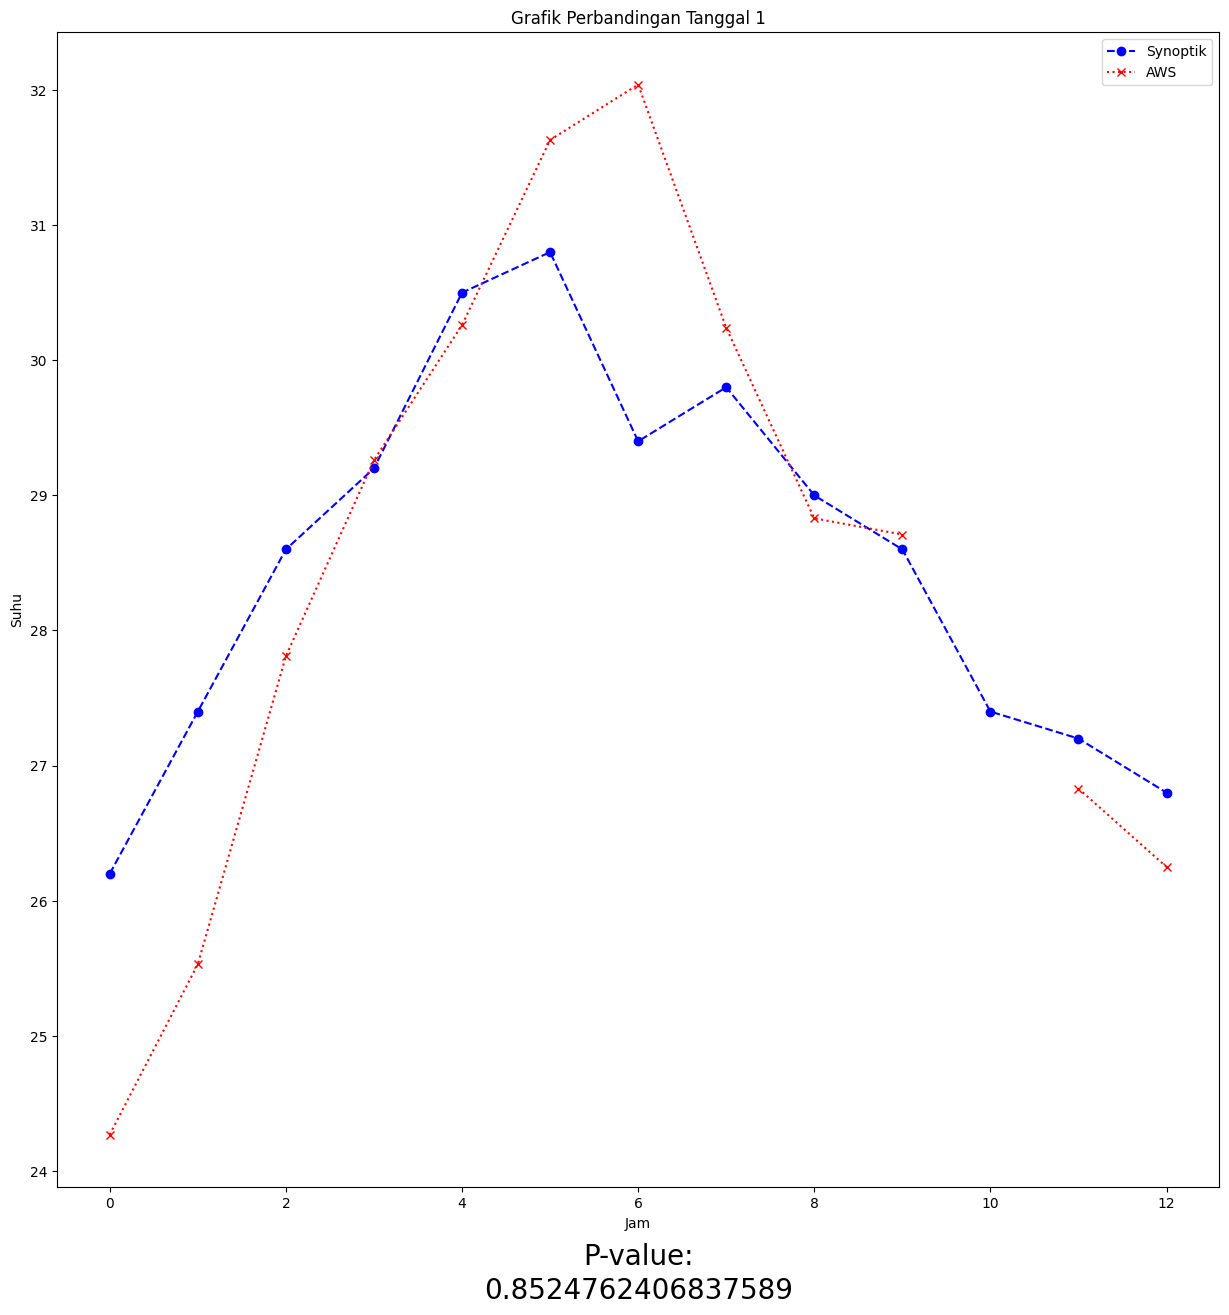

In [6]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[0])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['1']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='1', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['1'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('1')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['1']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='1', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['1'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('1')
    else:
      print("Dilakukan Uji T")
      ujiT('1')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('1')
    else:
      print("Dilakukan Uji T")
      ujiT('1')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 1')
plt.plot(df2_4['Jam'], df2_4['1'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 2

Indeks baris yang berisi NaN:
Index([13, 25], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.014917628047481106
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.9882457074031139
p-value for one tailed: 0.49412285370155695
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


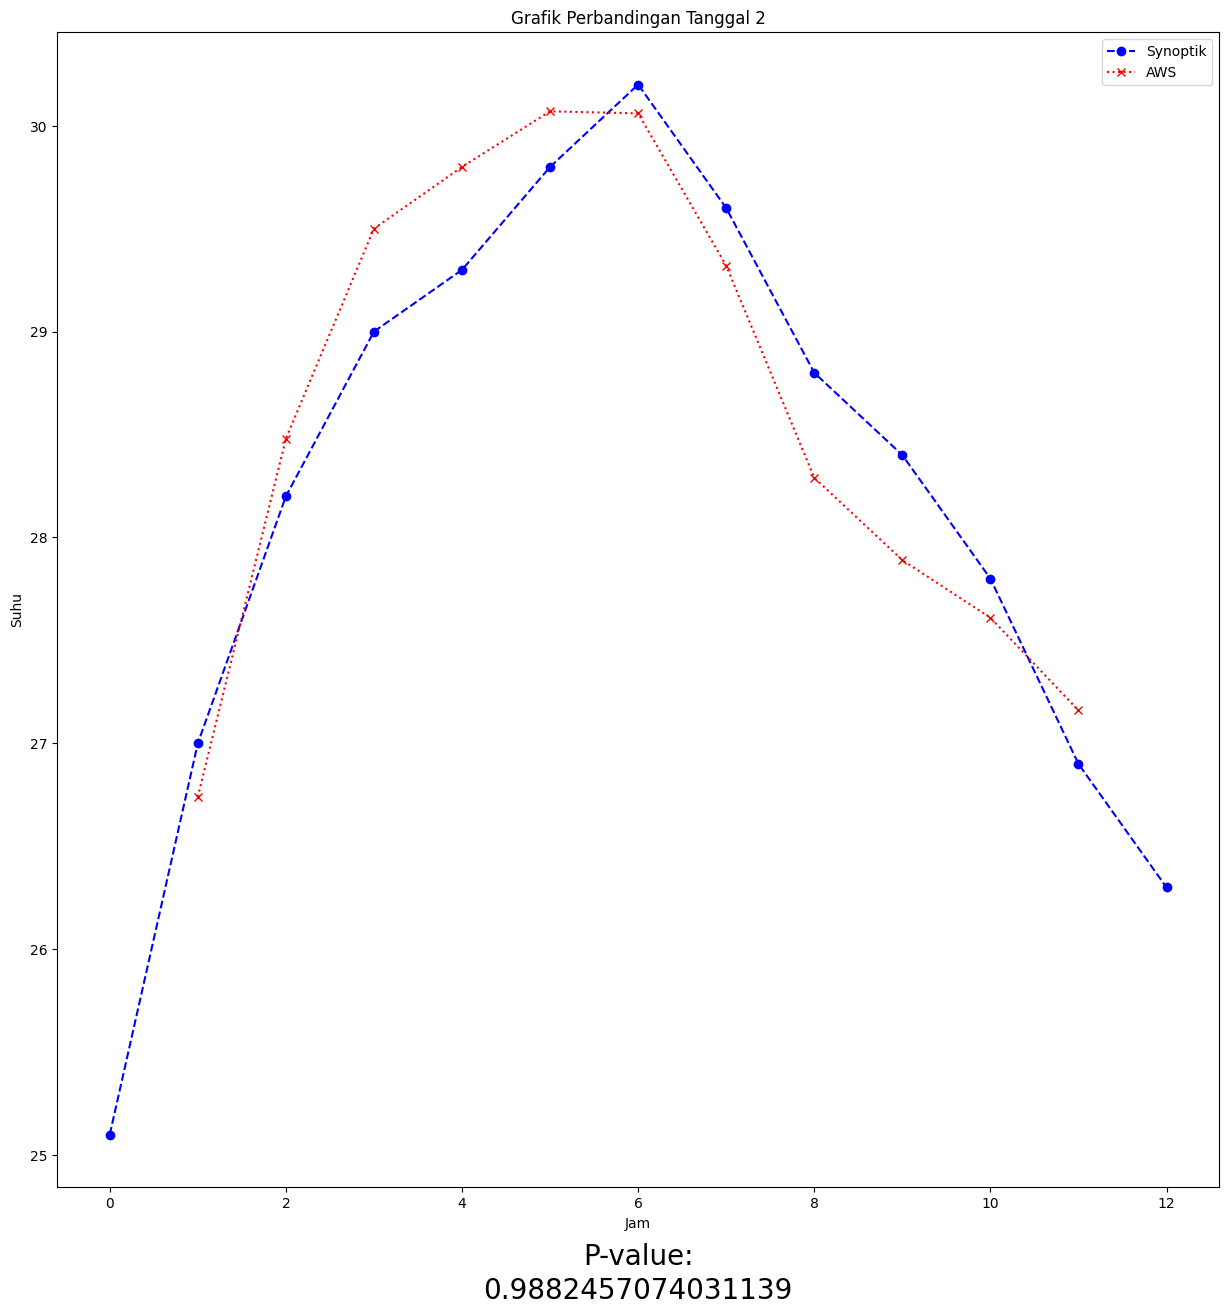

In [7]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[1])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['2']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='2', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['2'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('2')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['2']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='2', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['2'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('2')
    else:
      print("Dilakukan Uji T")
      ujiT('2')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('2')
    else:
      print("Dilakukan Uji T")
      ujiT('2')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 2')
plt.plot(df2_4['Jam'], df2_4['2'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 3

Indeks baris yang berisi NaN:
Index([28, 29, 37], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=35.00, p=0.27
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_980\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


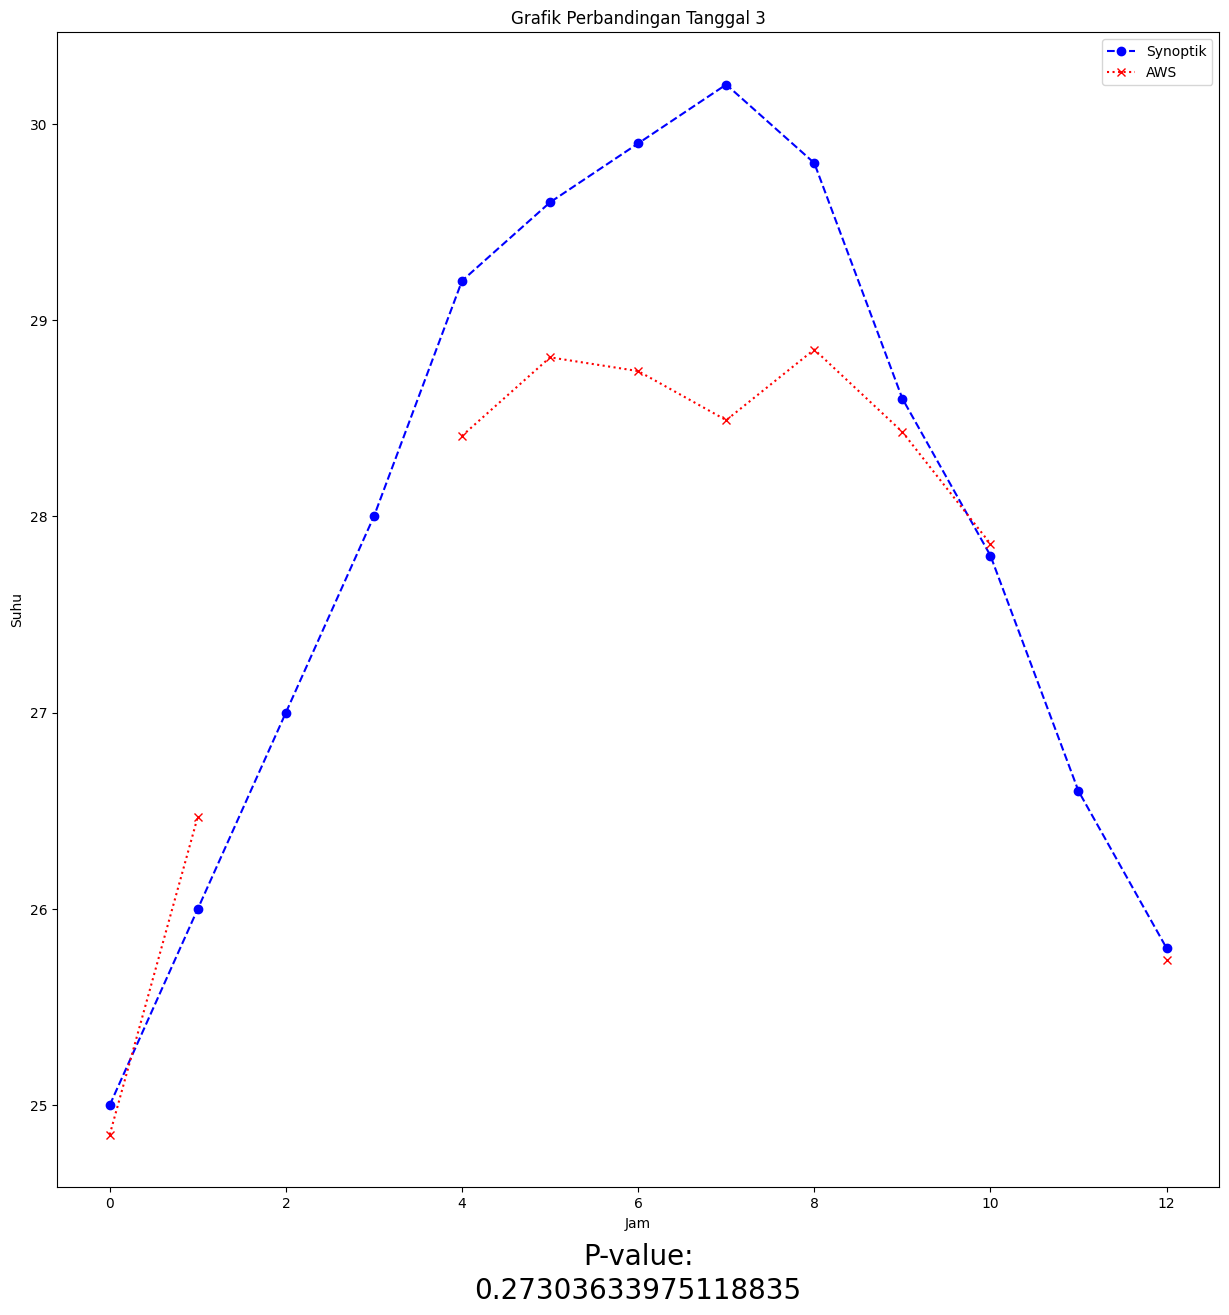

In [8]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[2])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['3']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='3', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['3'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('3')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['3']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='3', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['3'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('3')
    else:
      print("Dilakukan Uji T")
      ujiT('3')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('3')
    else:
      print("Dilakukan Uji T")
      ujiT('3')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 3')
plt.plot(df2_4['Jam'], df2_4['3'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 4

Indeks baris yang berisi NaN:
Index([39, 40, 50], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=32.00, p=0.19
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_980\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


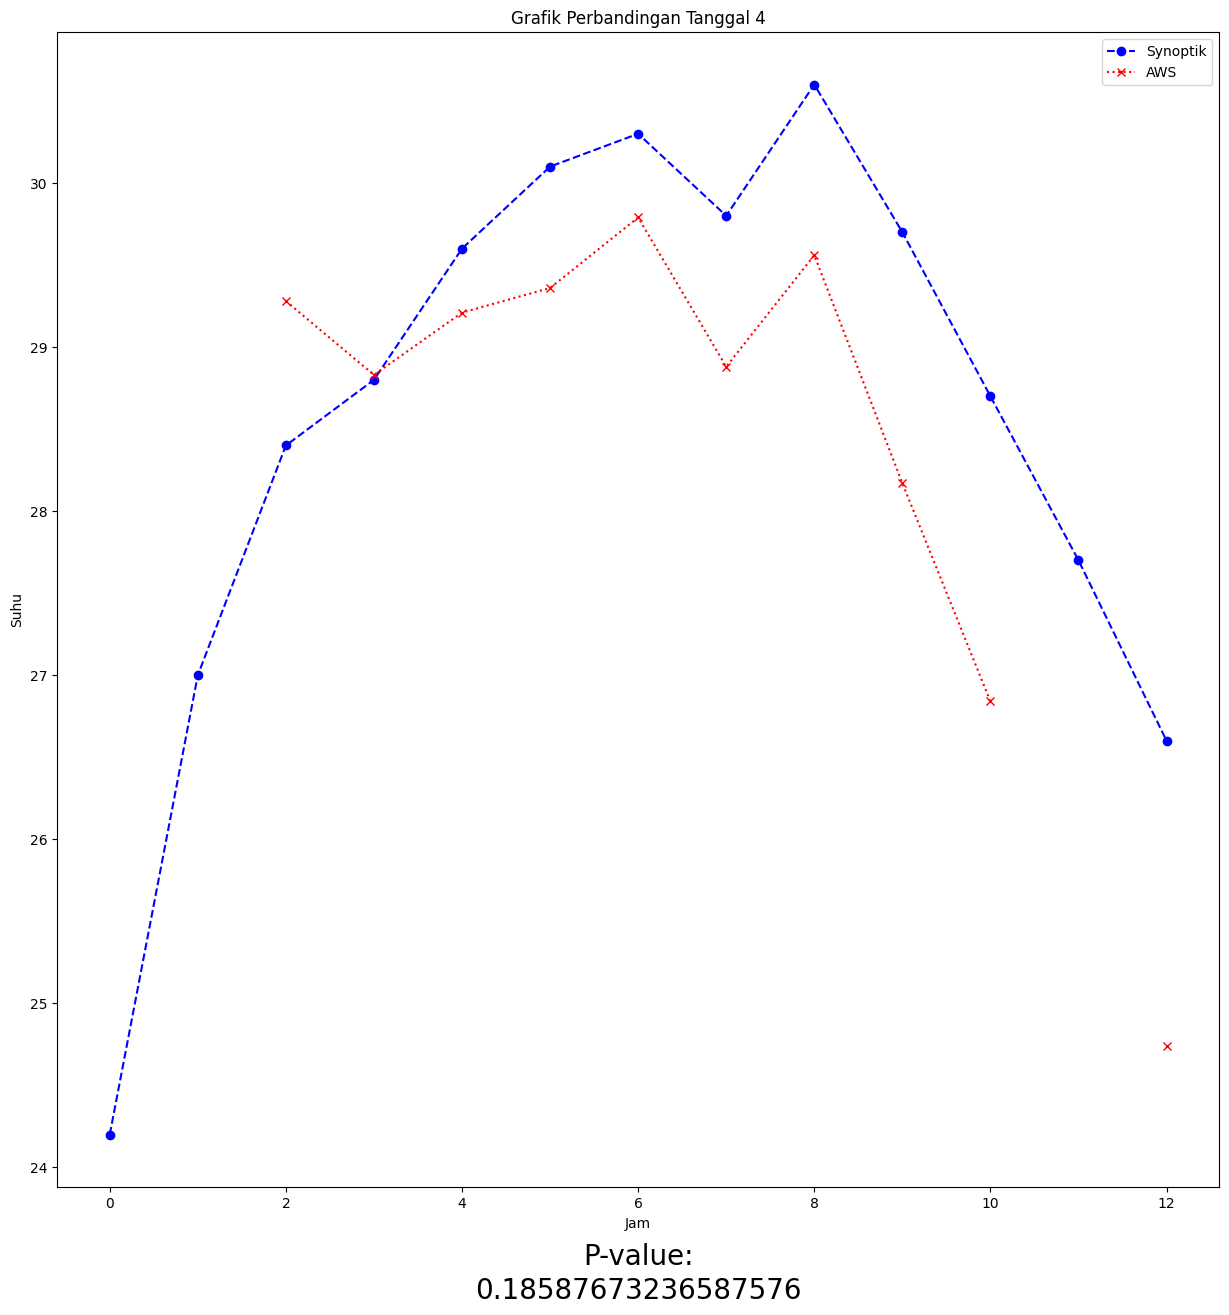

In [9]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[3])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['4']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='4', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('4')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['4']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='4', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['4'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('4')
    else:
      print("Dilakukan Uji T")
      ujiT('4')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('4')
    else:
      print("Dilakukan Uji T")
      ujiT('4')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 4')
plt.plot(df2_4['Jam'], df2_4['4'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 5

Indeks baris yang berisi NaN:
Index([53, 54, 55, 58, 61, 64], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.7682091481265882
Critical value for t two tailed: 2.1788128296634177
Critical value for t one tailed: 1.782287555649159
p-value for two tailed: 0.10241645079012685
p-value for one tailed: 0.05120822539506342
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


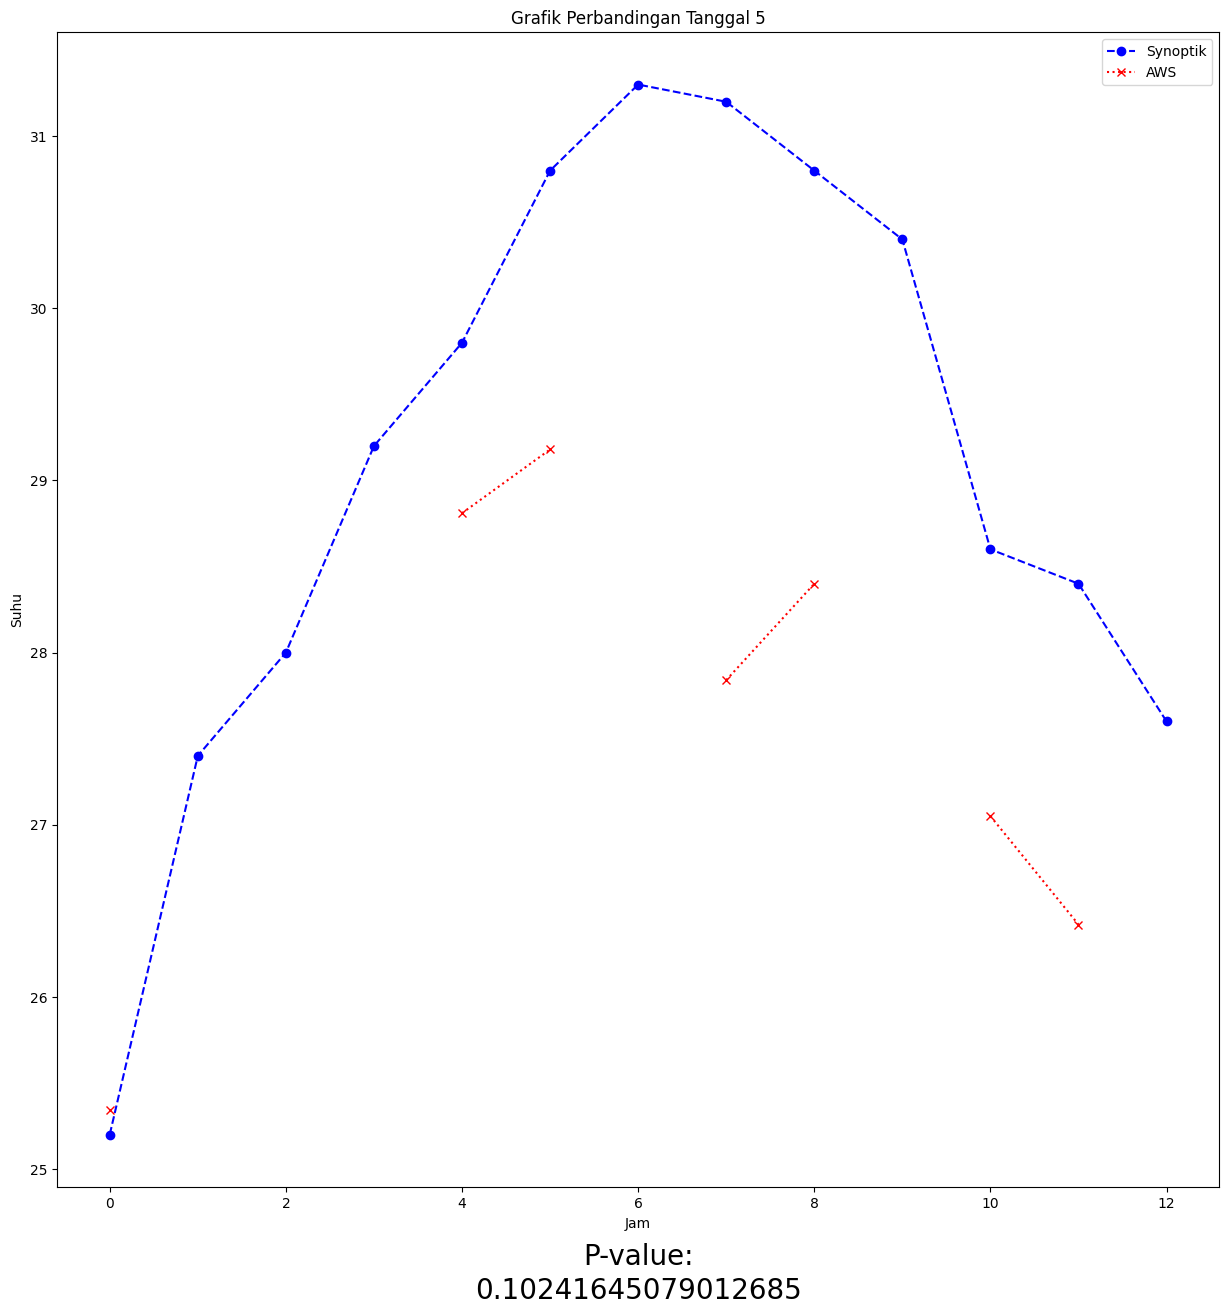

In [10]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[4])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['5']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='5', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['5'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('5')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['5']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='5', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['5'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('5')
    else:
      print("Dilakukan Uji T")
      ujiT('5')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('5')
    else:
      print("Dilakukan Uji T")
      ujiT('5')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 5')
plt.plot(df2_4['Jam'], df2_4['5'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 6

Indeks baris yang berisi NaN:
Index([65, 76], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.6457295595492127
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.11544477108067874
p-value for one tailed: 0.05772238554033937
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


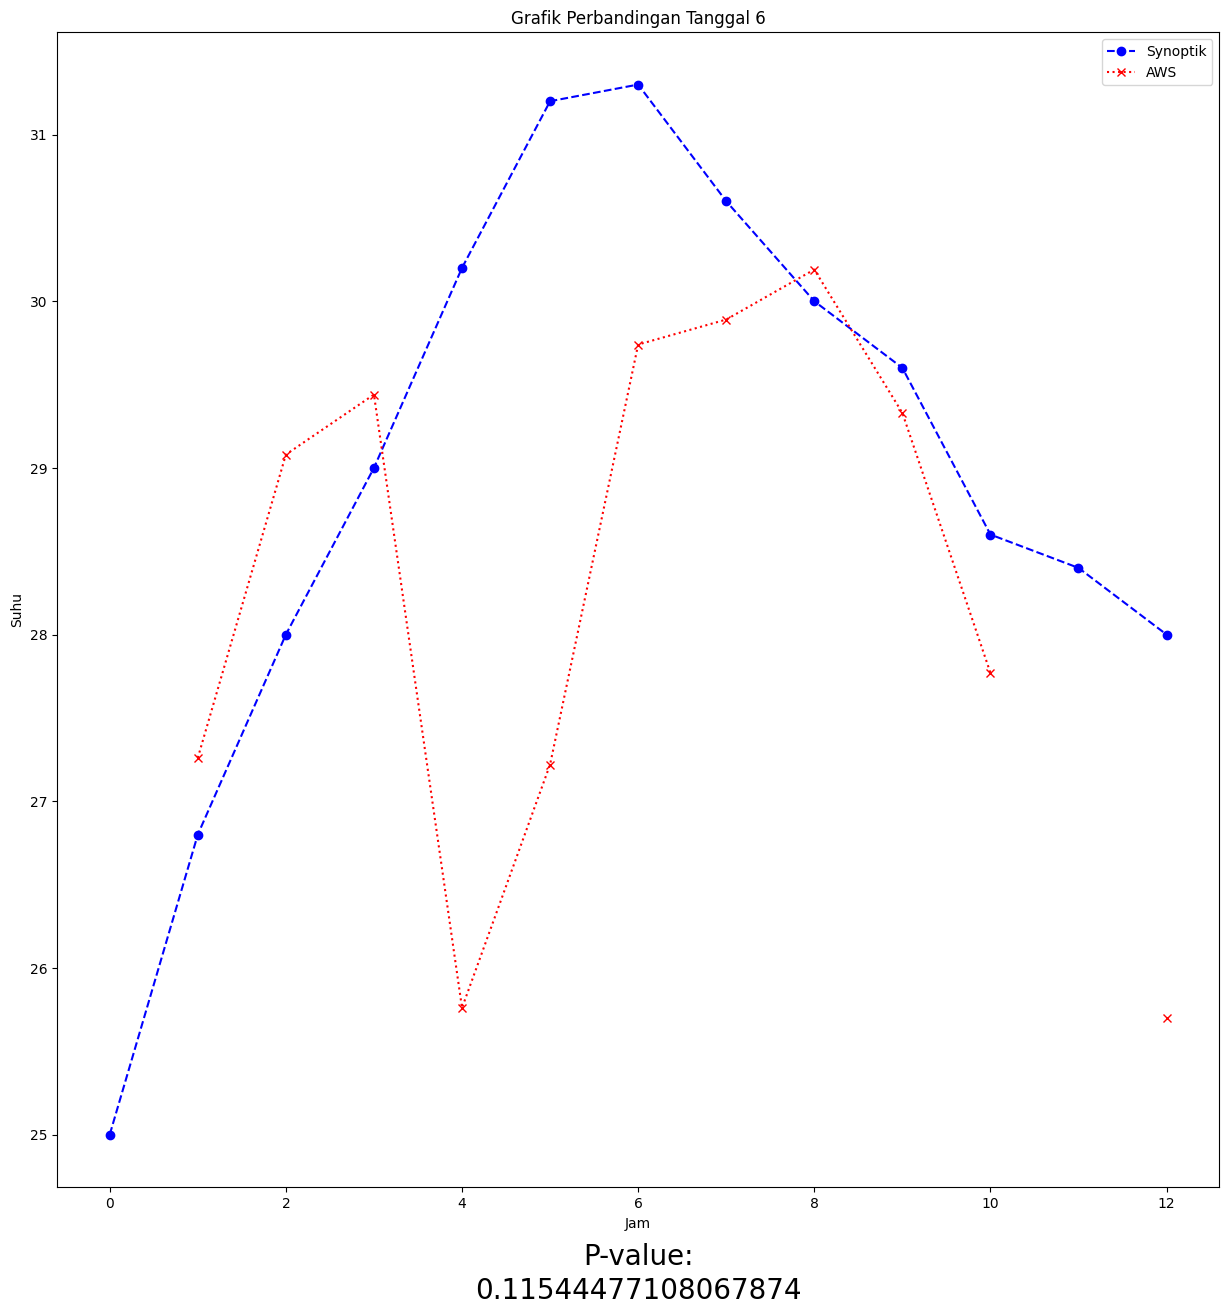

In [11]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[5])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['6']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='6', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('6')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['6']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='6', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['6'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('6')
    else:
      print("Dilakukan Uji T")
      ujiT('6')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('6')
    else:
      print("Dilakukan Uji T")
      ujiT('6')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 6')
plt.plot(df2_4['Jam'], df2_4['6'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 7

Indeks baris yang berisi NaN:
Index([78, 79, 80], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.6039870178730473
Critical value for t two tailed: 2.10092204024096
Critical value for t one tailed: 1.7340636066175354
p-value for two tailed: 0.5533890801930317
p-value for one tailed: 0.27669454009651584
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


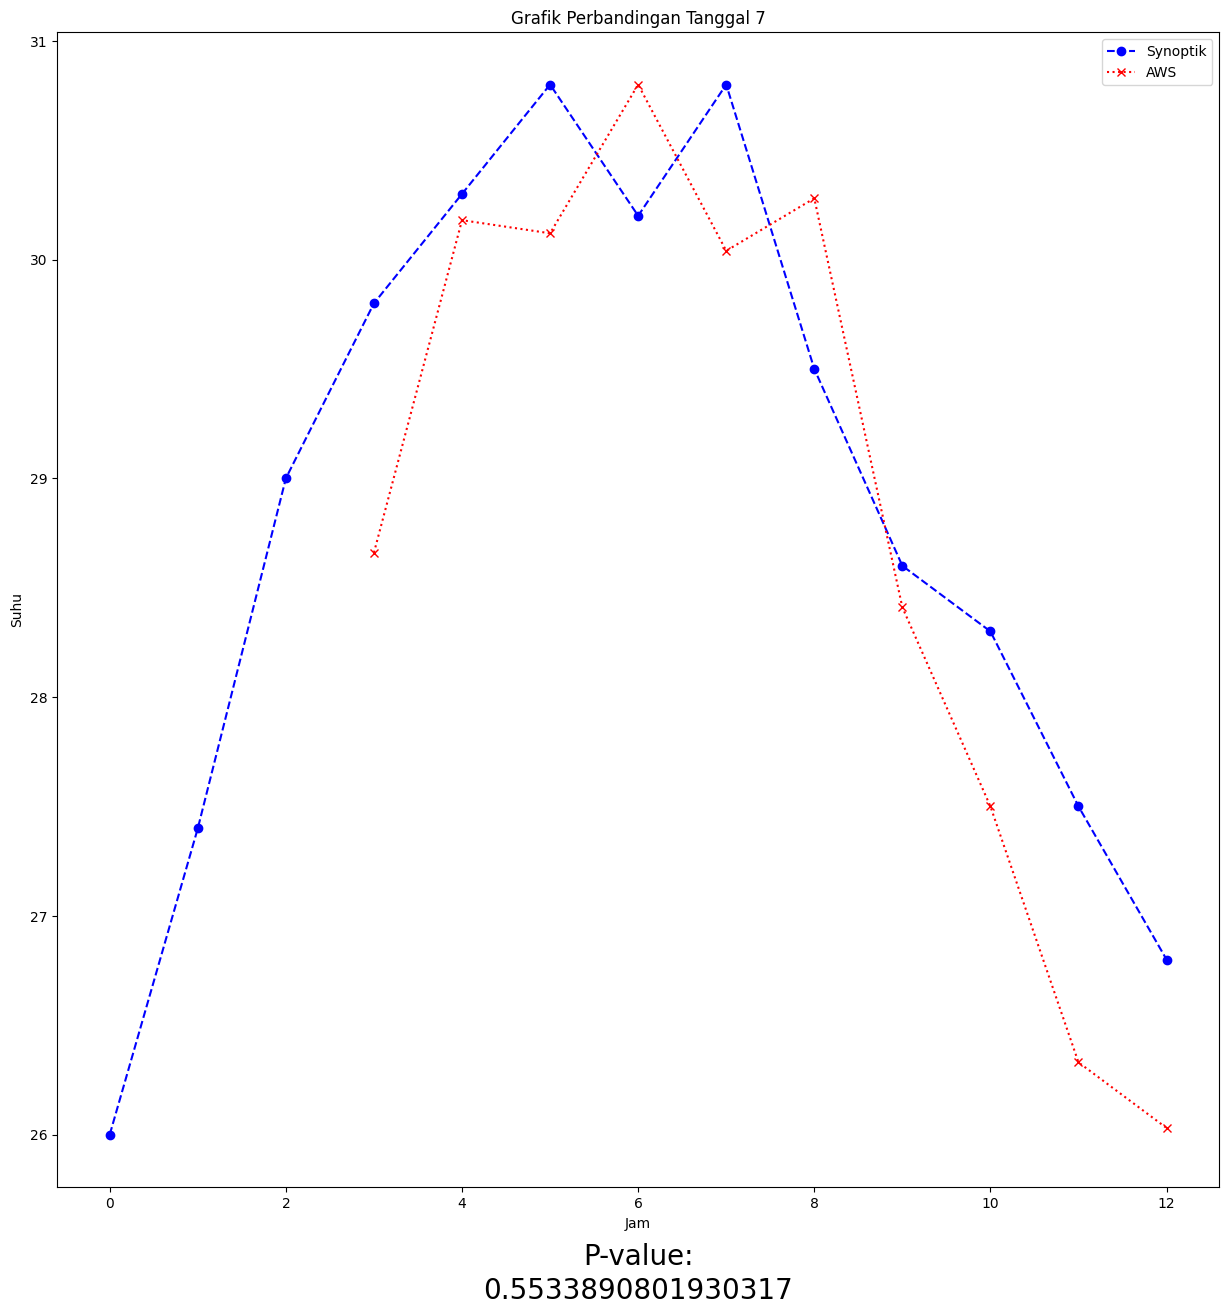

In [12]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[6])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['7']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='7', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['7'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('7')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['7']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='7', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['7'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('7')
    else:
      print("Dilakukan Uji T")
      ujiT('7')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('7')
    else:
      print("Dilakukan Uji T")
      ujiT('7')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 7')
plt.plot(df2_4['Jam'], df2_4['7'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 8

Indeks baris yang berisi NaN:
Index([92], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.9500844878580544
Critical value for t two tailed: 2.0738730679040147
Critical value for t one tailed: 1.717144374380242
p-value for two tailed: 0.35239074774379775
p-value for one tailed: 0.17619537387189887
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


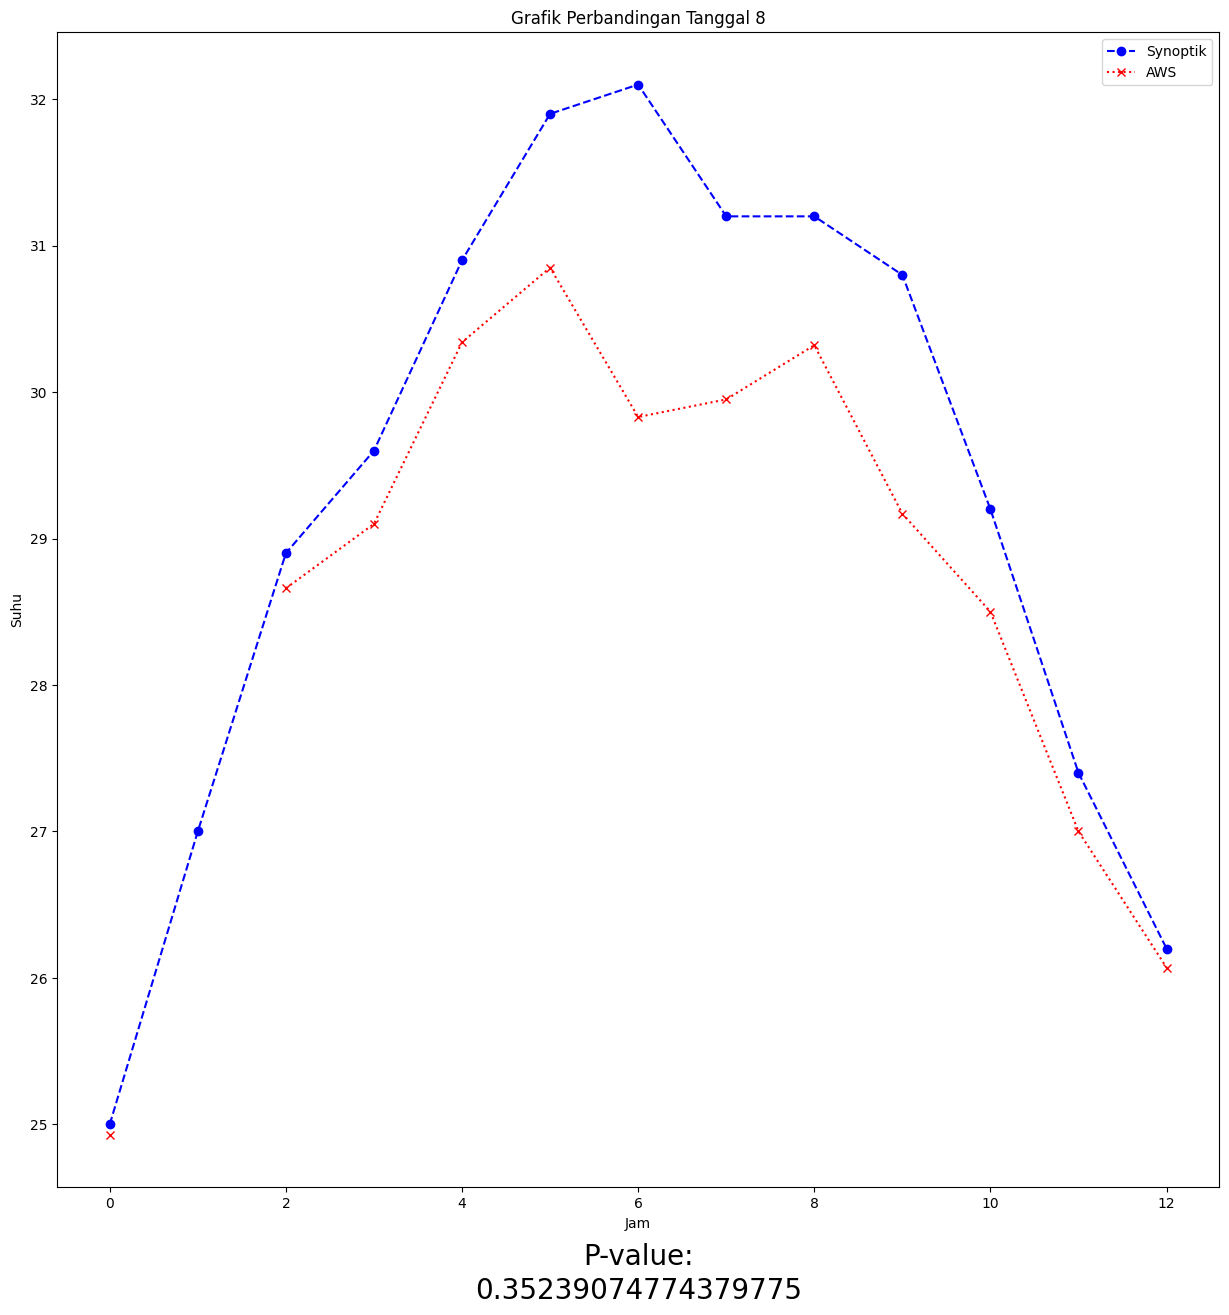

In [13]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[7])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['8']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='8', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['8'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('8')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['8']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='8', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['8'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('8')
    else:
      print("Dilakukan Uji T")
      ujiT('8')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('8')
    else:
      print("Dilakukan Uji T")
      ujiT('8')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 8')
plt.plot(df2_4['Jam'], df2_4['8'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 9

Indeks baris yang berisi NaN:
Index([105], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 3.944339076363063
Critical value for t two tailed: 2.0738730679040147
Critical value for t one tailed: 1.717144374380242
p-value for two tailed: 0.0006907380195804169
p-value for one tailed: 0.00034536900979020846
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


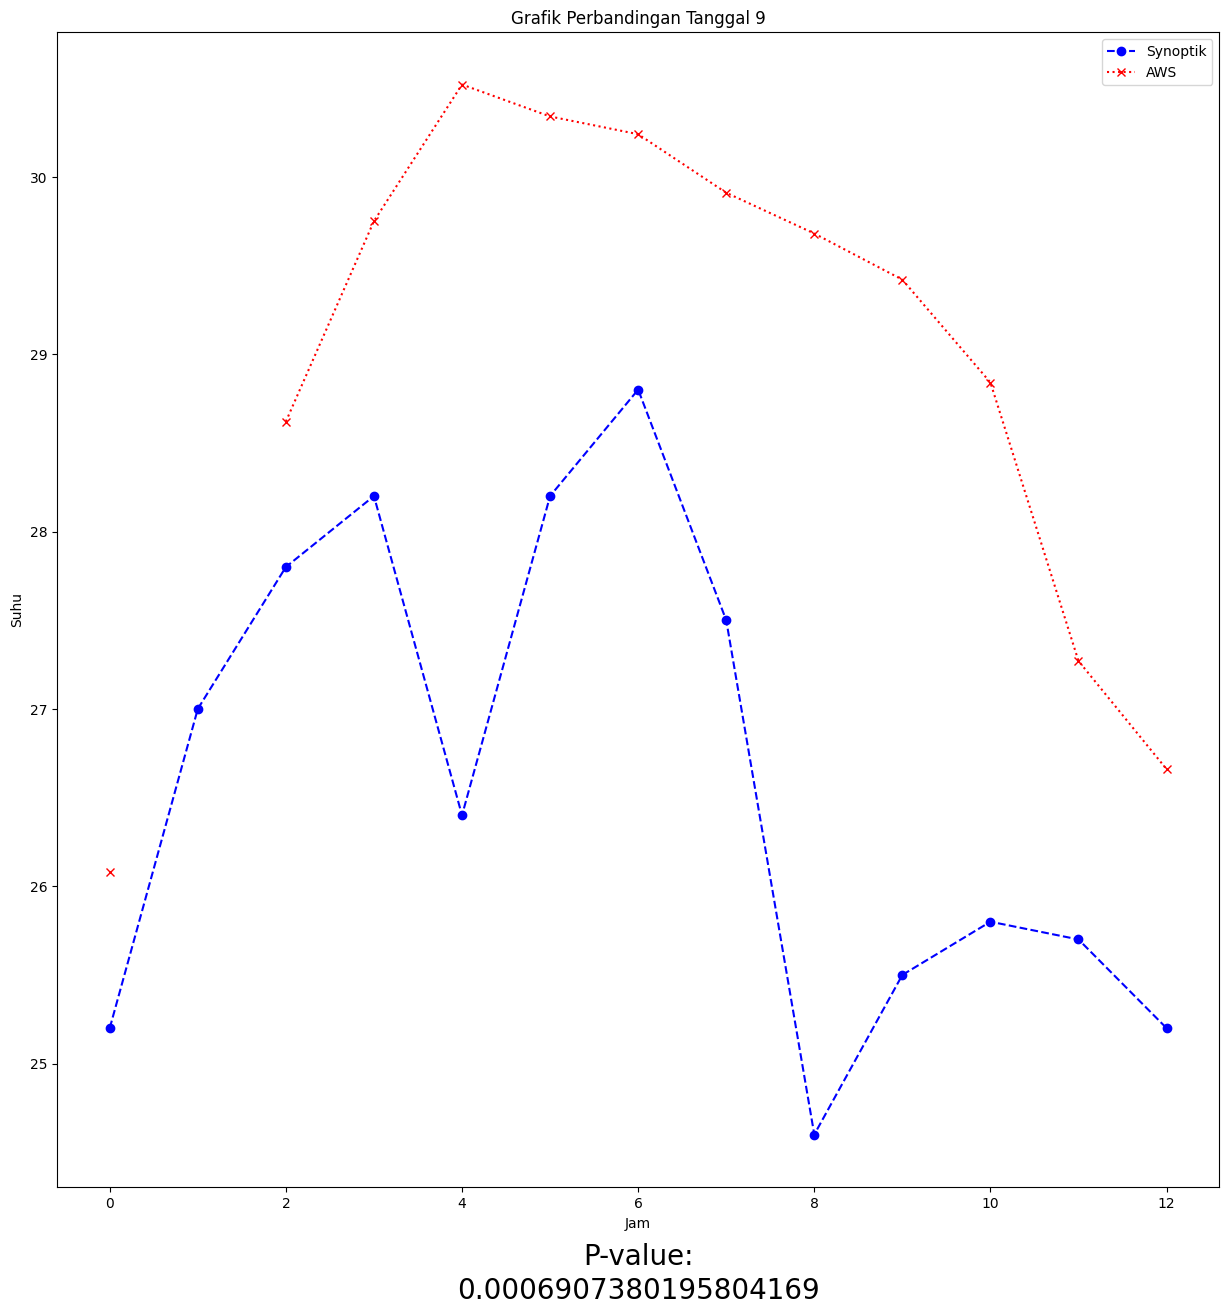

In [14]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[8])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['9']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='9', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['9'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('9')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['9']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='9', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['9'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('9')
    else:
      print("Dilakukan Uji T")
      ujiT('9')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('9')
    else:
      print("Dilakukan Uji T")
      ujiT('9')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 9')
plt.plot(df2_4['Jam'], df2_4['9'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 10

Indeks baris yang berisi NaN:
Index([118, 127, 128, 129], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=49.00, p=0.48
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_980\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


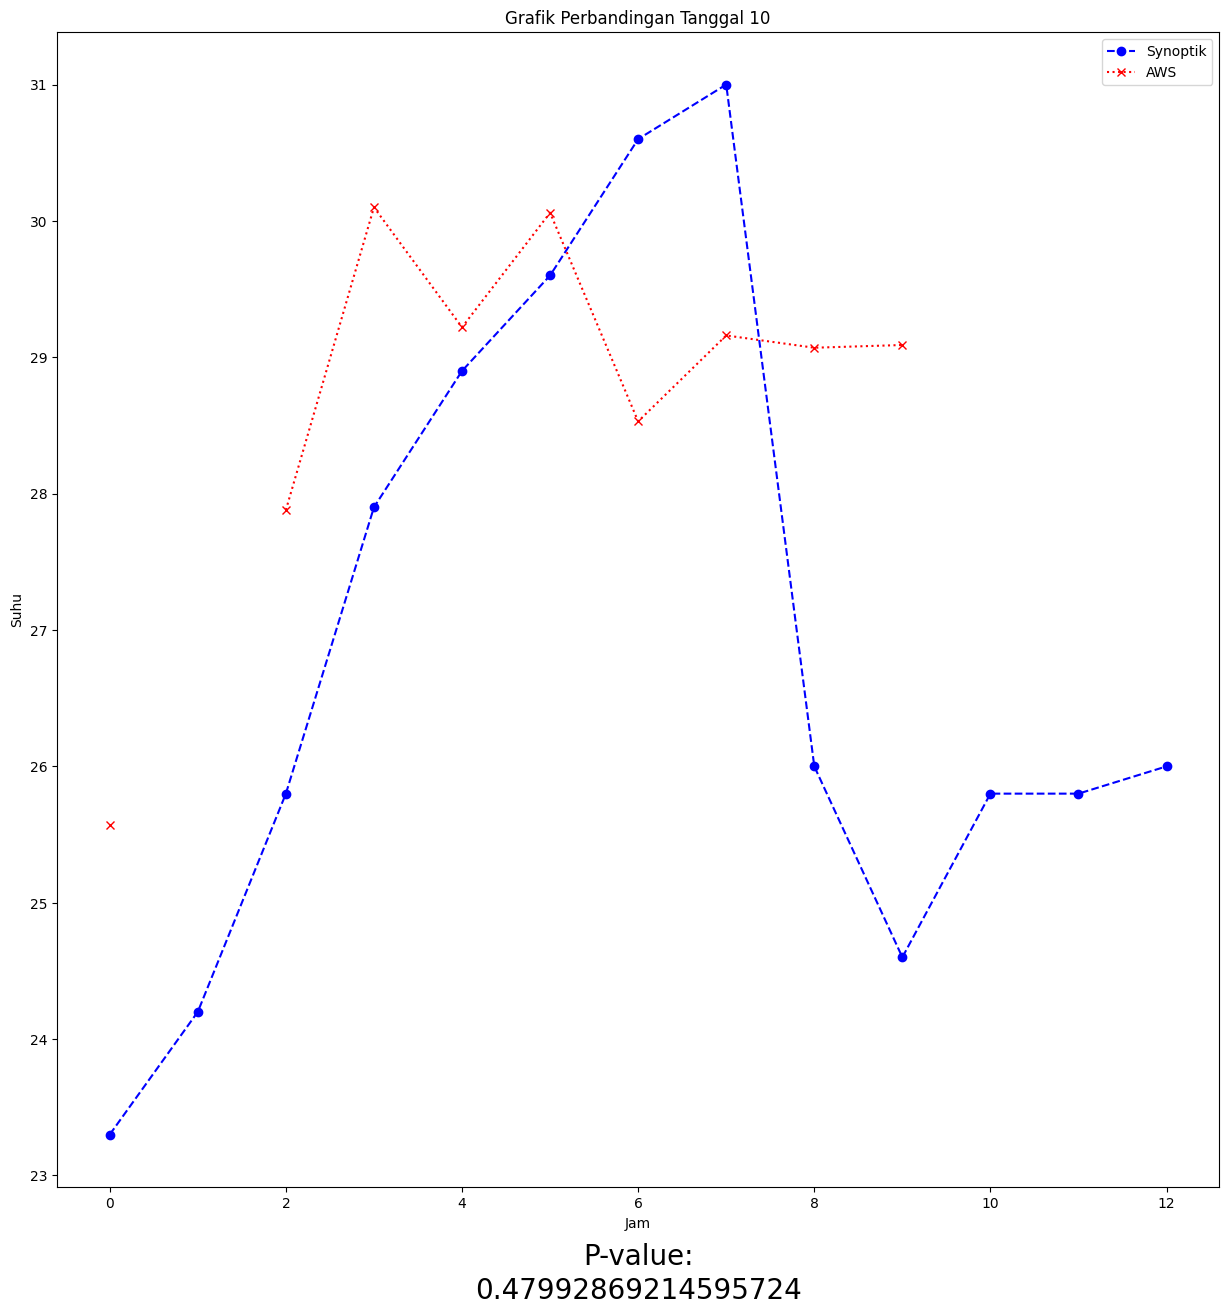

In [15]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[9])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['10']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='10', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('10')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['10']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='10', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 10')
plt.plot(df2_4['Jam'], df2_4['10'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 11

Indeks baris yang berisi NaN:
Index([130, 131, 141], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=63.50, p=0.33
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_980\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


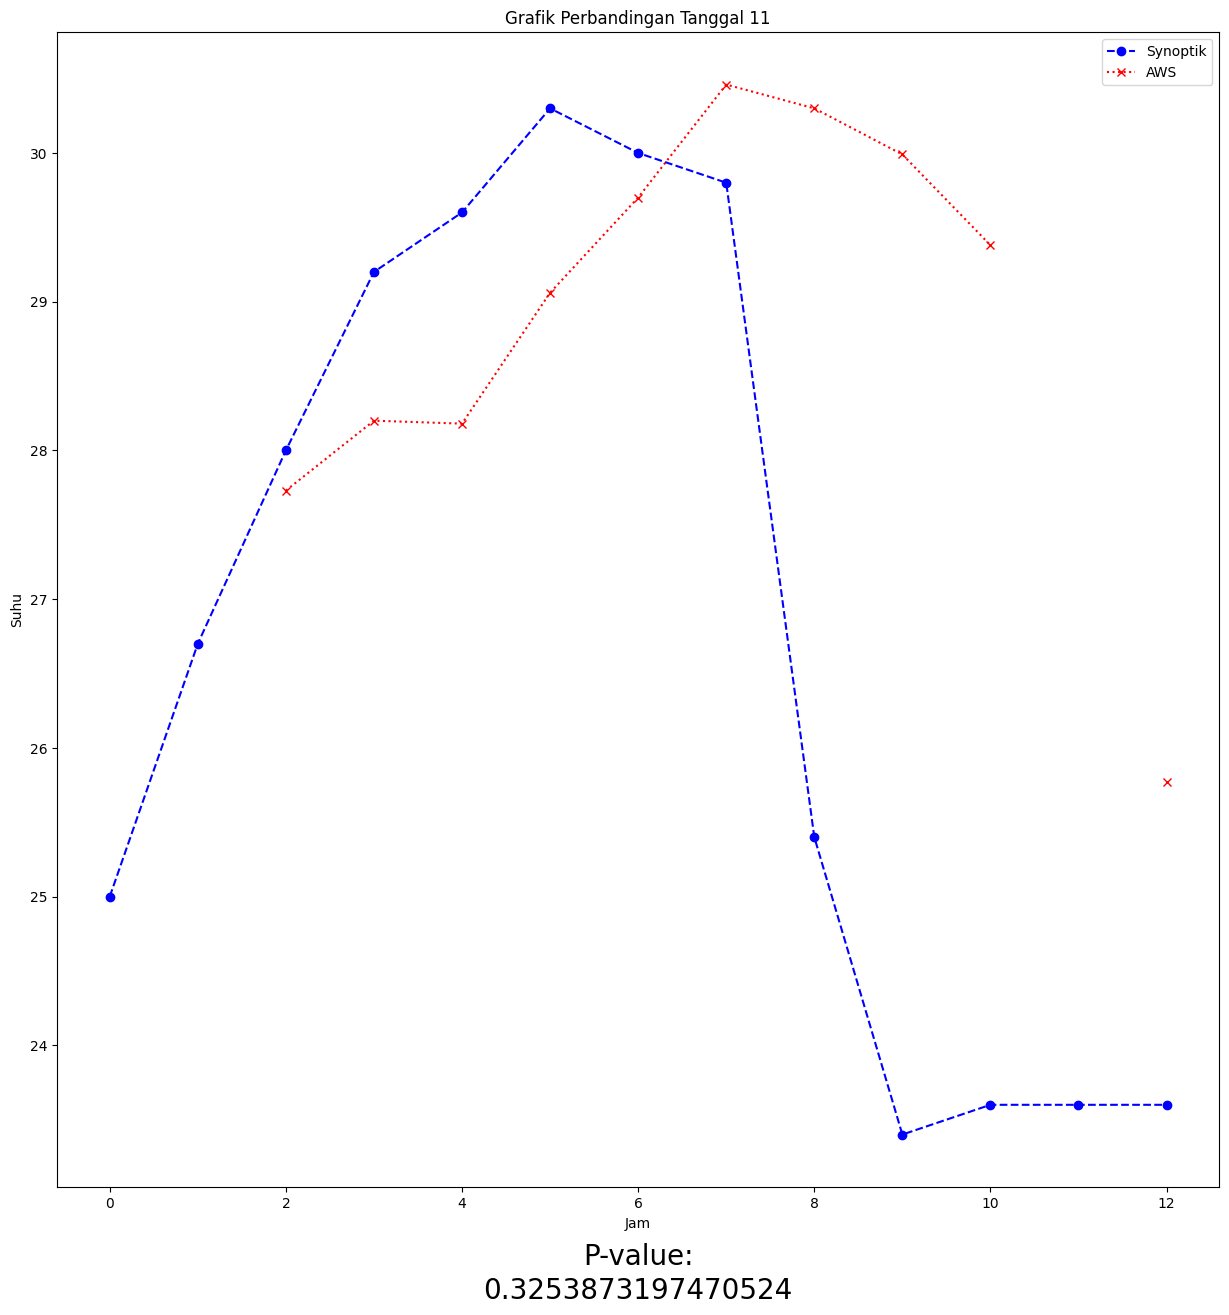

In [16]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[10])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['11']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='11', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('11')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['11']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='11', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 11')
plt.plot(df2_4['Jam'], df2_4['11'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 12

Indeks baris yang berisi NaN:
Index([143, 144, 151, 152, 153, 154, 155], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 2.5523314008057802
Critical value for t two tailed: 2.2281388519649385
Critical value for t one tailed: 1.8124611228107335
p-value for two tailed: 0.02874878741800746
p-value for one tailed: 0.01437439370900373
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


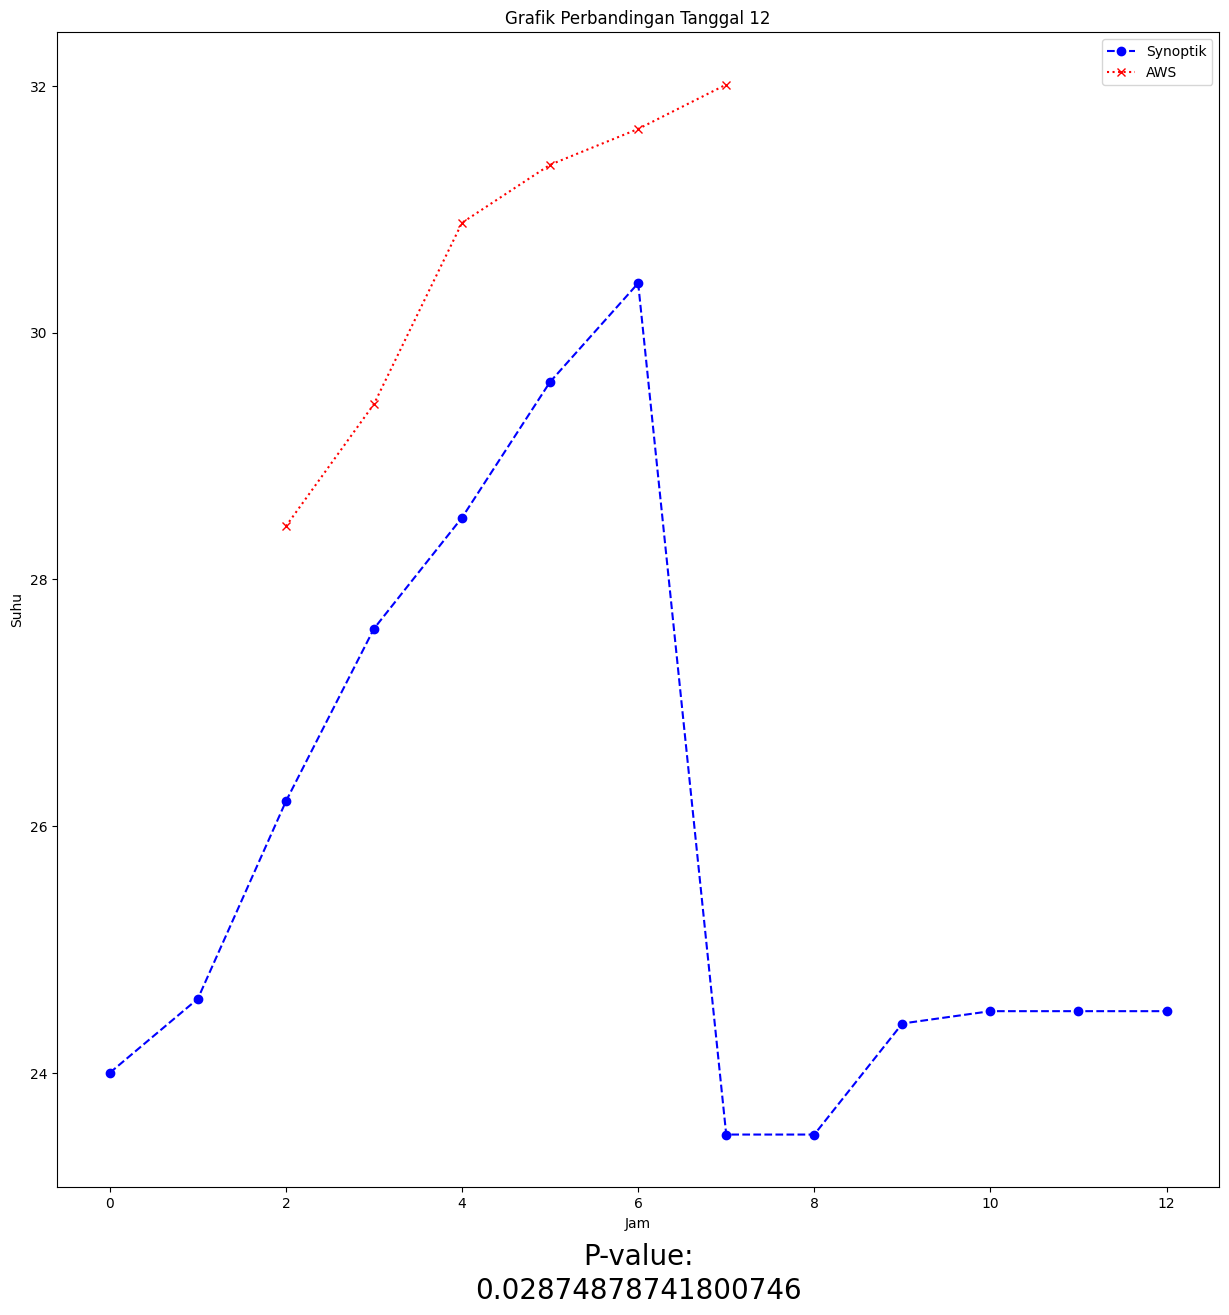

In [17]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[11])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['12']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='12', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('12')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['12']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='12', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 12')
plt.plot(df2_4['Jam'], df2_4['12'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 13

Indeks baris yang berisi NaN:
Index([156, 157, 167, 168], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 4.573264408571913
Critical value for t two tailed: 2.119905299221011
Critical value for t one tailed: 1.74588367627624
p-value for two tailed: 0.00031250935440518823
p-value for one tailed: 0.00015625467720259412
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


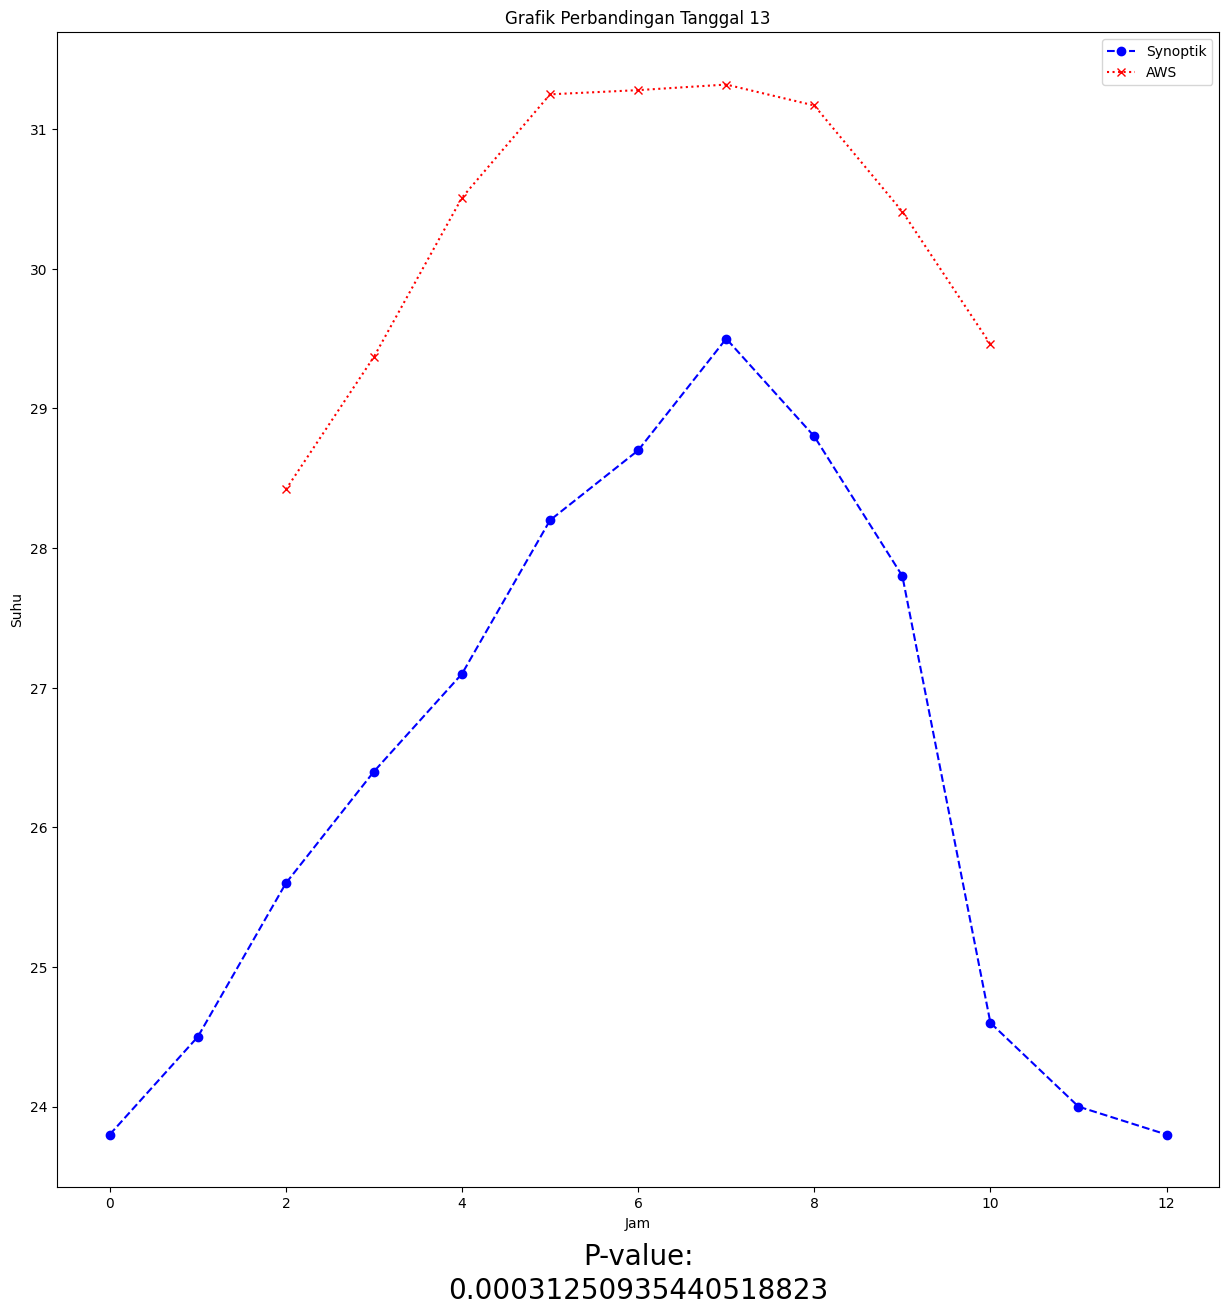

In [18]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[12])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['13']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='13', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['13'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('13')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['13']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='13', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['13'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('13')
    else:
      print("Dilakukan Uji T")
      ujiT('13')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('13')
    else:
      print("Dilakukan Uji T")
      ujiT('13')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 13')
plt.plot(df2_4['Jam'], df2_4['13'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 14

Indeks baris yang berisi NaN:
Index([169, 180], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.5715935651519218
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.5739657638450395
p-value for one tailed: 0.28698288192251975
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


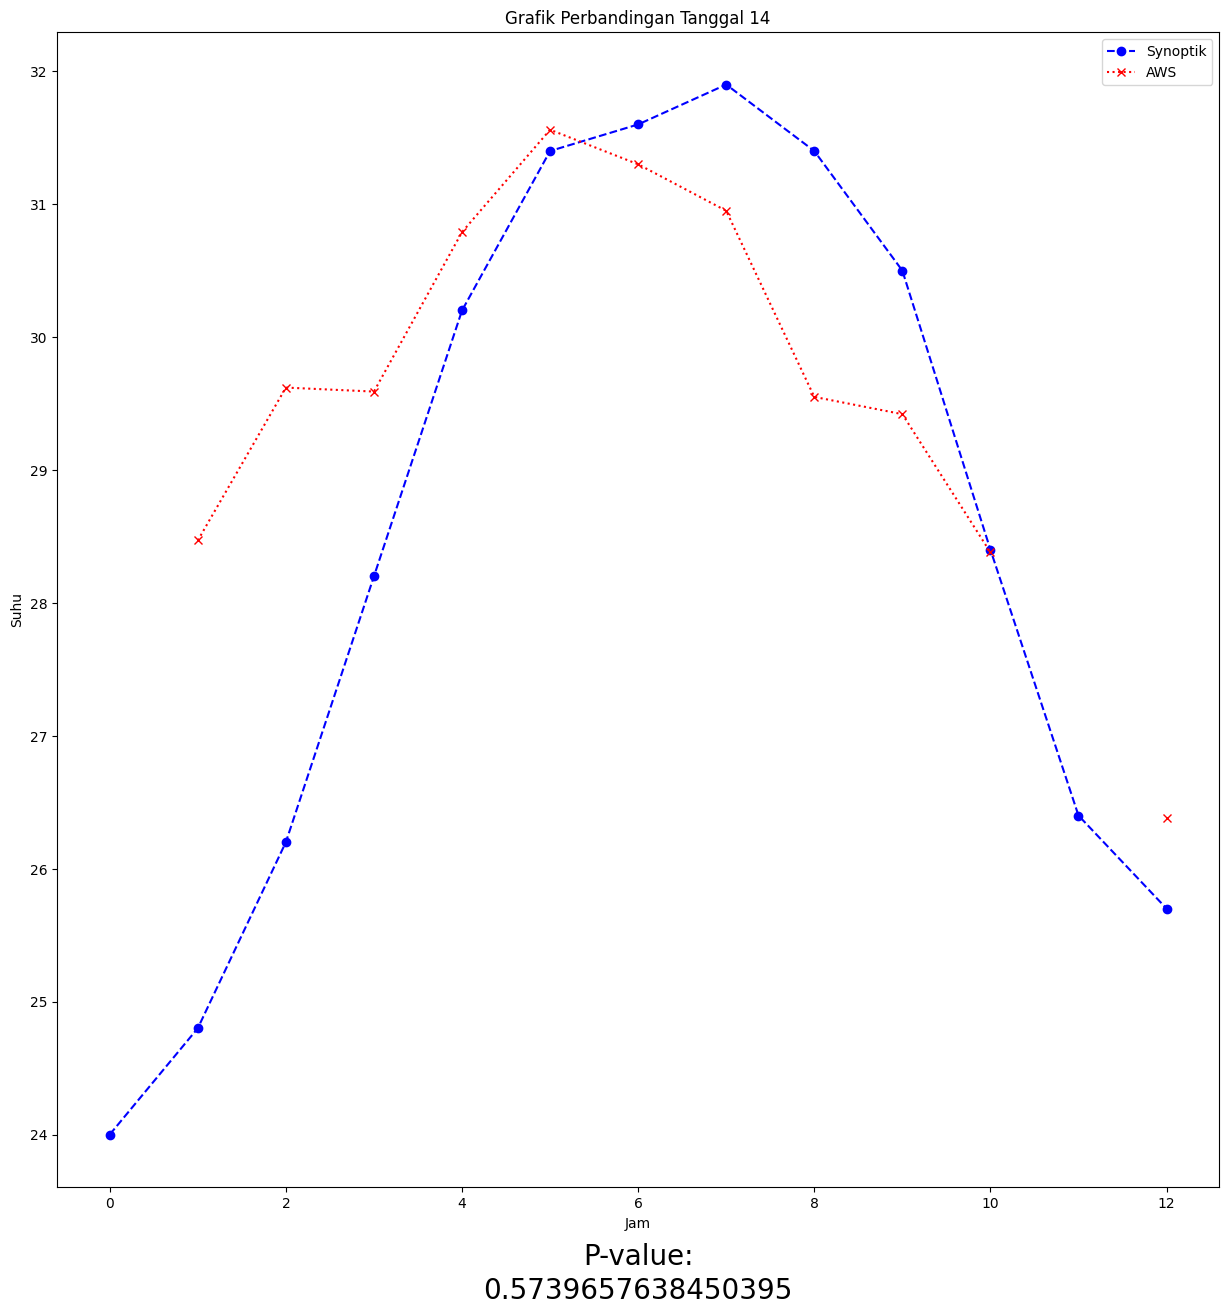

In [19]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[13])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['14']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='14', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['14'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('14')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['14']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='14', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['14'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('14')
    else:
      print("Dilakukan Uji T")
      ujiT('14')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('14')
    else:
      print("Dilakukan Uji T")
      ujiT('14')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 14')
plt.plot(df2_4['Jam'], df2_4['14'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 15

Indeks baris yang berisi NaN:
Index([182, 194], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.5931064320757443
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.5597578177305991
p-value for one tailed: 0.27987890886529954
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


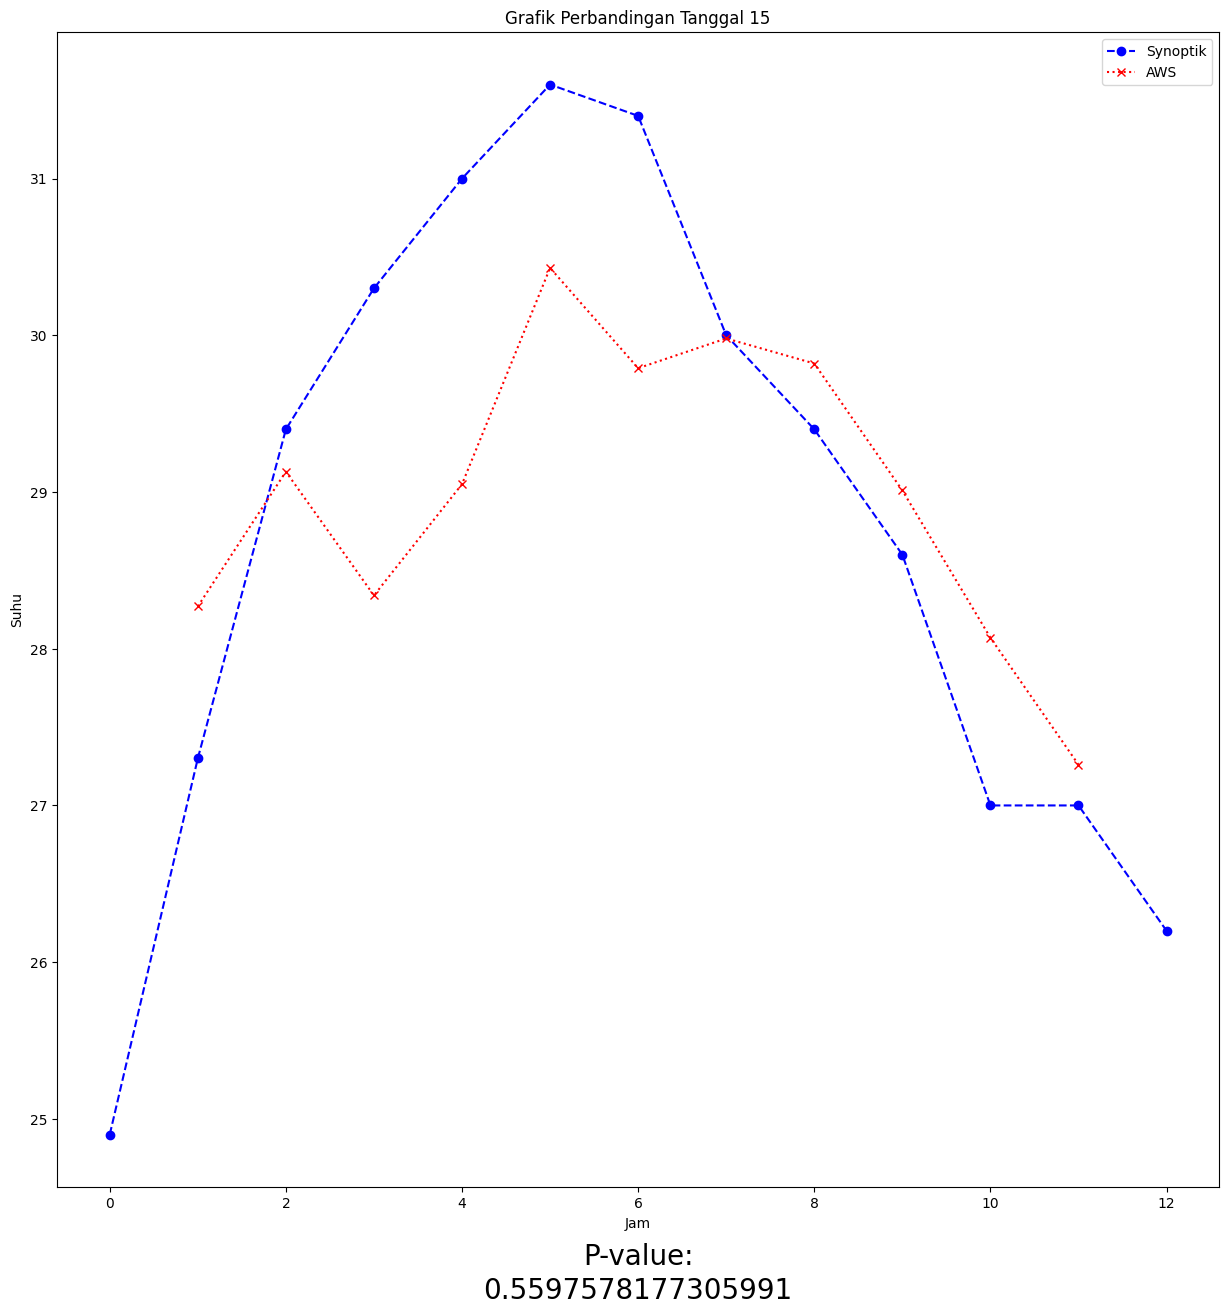

In [20]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[14])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['15']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='15', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['15'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('15')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['15']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='15', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['15'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('15')
    else:
      print("Dilakukan Uji T")
      ujiT('15')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('15')
    else:
      print("Dilakukan Uji T")
      ujiT('15')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 15')
plt.plot(df2_4['Jam'], df2_4['15'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 16

Indeks baris yang berisi NaN:
Index([195, 204, 205, 206], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 2.644180710439047
Critical value for t two tailed: 2.119905299221011
Critical value for t one tailed: 1.74588367627624
p-value for two tailed: 0.017677749745721005
p-value for one tailed: 0.008838874872860503
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


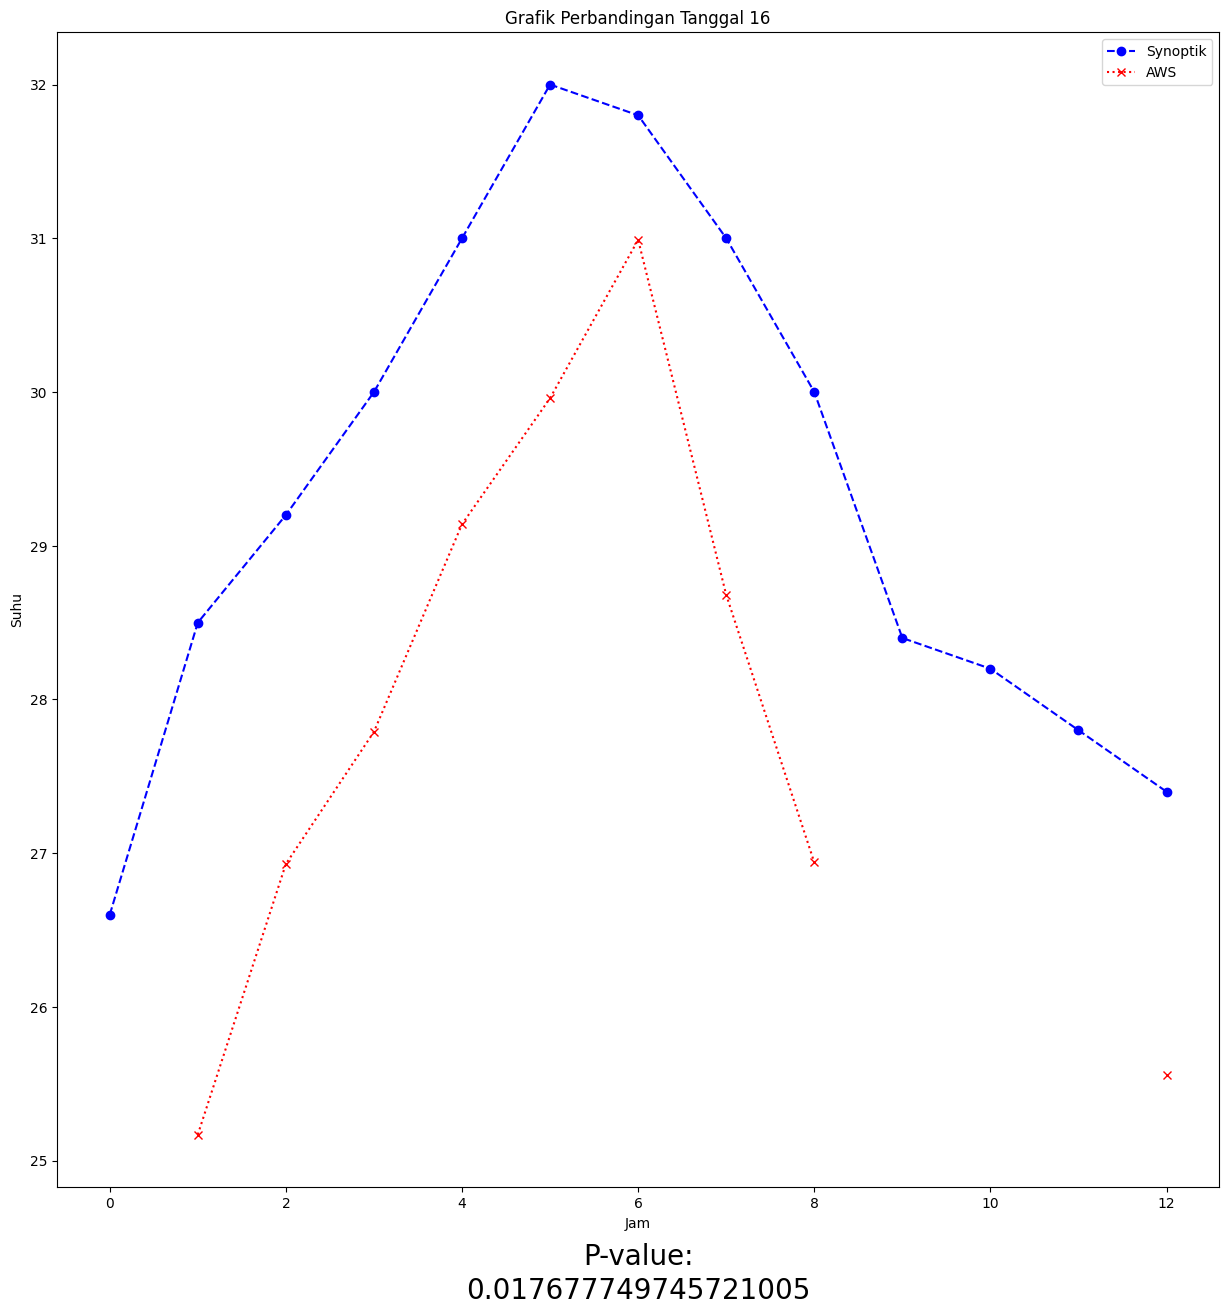

In [21]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[15])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['16']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='16', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['16'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('16')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['16']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='16', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['16'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('16')
    else:
      print("Dilakukan Uji T")
      ujiT('16')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('16')
    else:
      print("Dilakukan Uji T")
      ujiT('16')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 16')
plt.plot(df2_4['Jam'], df2_4['16'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 17

Indeks baris yang berisi NaN:
Index([208, 218, 219, 220], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.18433326329392036
Critical value for t two tailed: 2.119905299221011
Critical value for t one tailed: 1.74588367627624
p-value for two tailed: 0.856068095290015
p-value for one tailed: 0.4280340476450075
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


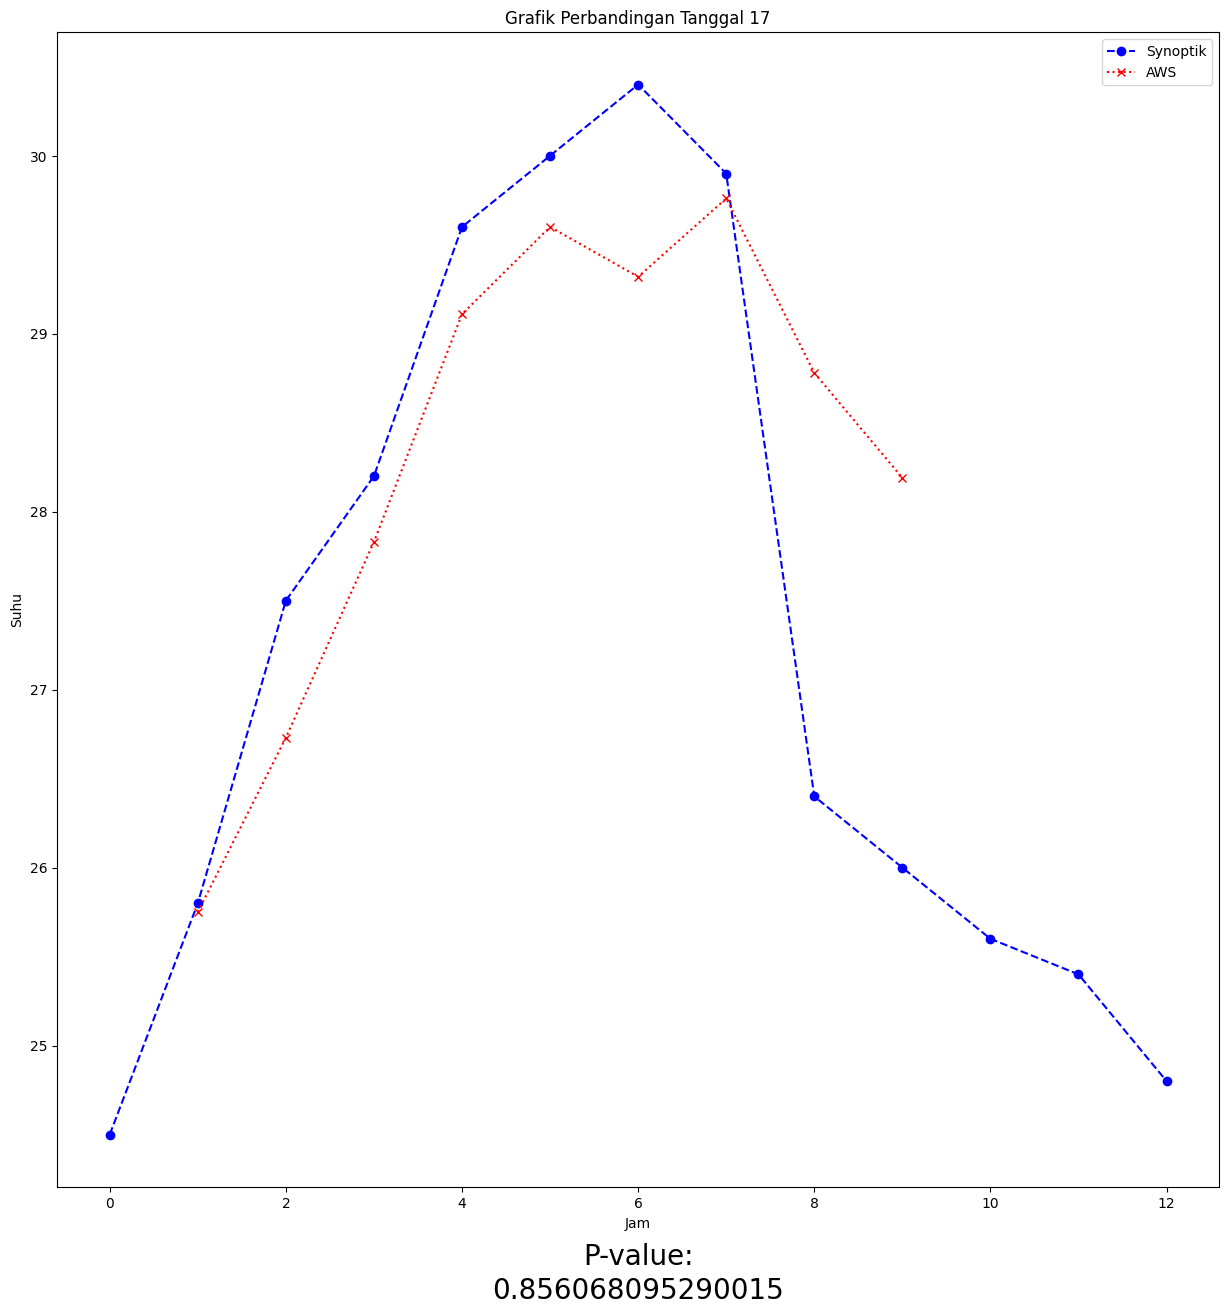

In [22]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[16])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['17']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='17', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['17'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('17')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['17']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='17', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['17'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('17')
    else:
      print("Dilakukan Uji T")
      ujiT('17')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('17')
    else:
      print("Dilakukan Uji T")
      ujiT('17')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 17')
plt.plot(df2_4['Jam'], df2_4['17'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 18

Indeks baris yang berisi NaN:
Index([221, 222, 231], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=47.50, p=0.88
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_980\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


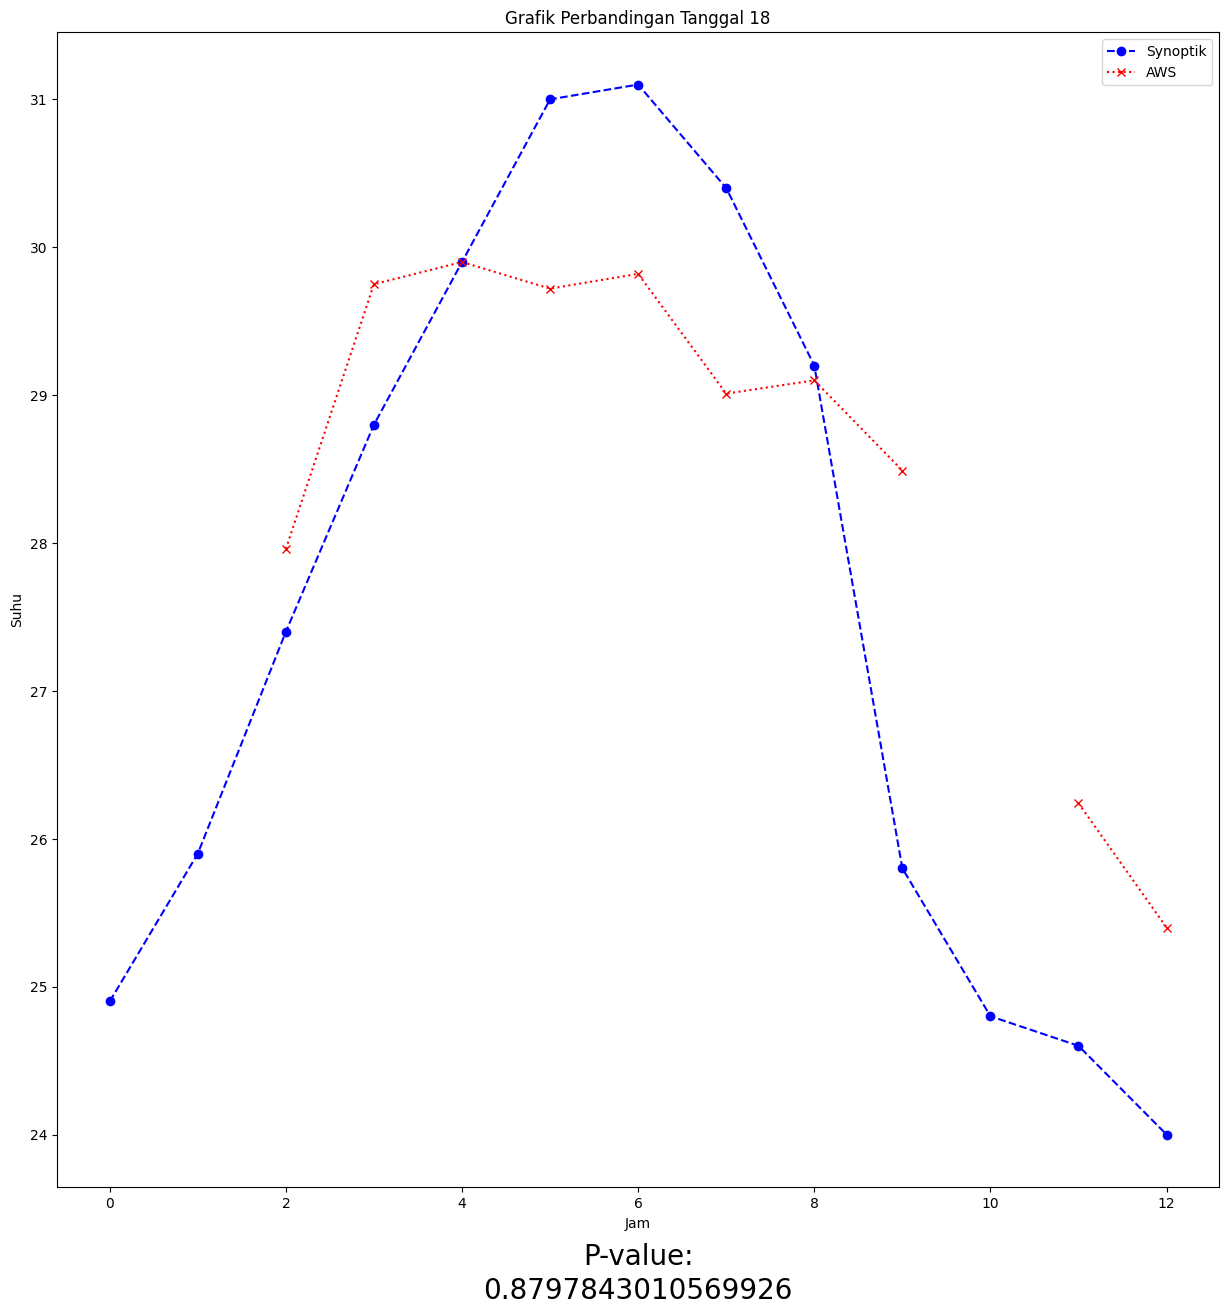

In [23]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[17])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['18']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='18', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['18'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('18')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['18']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='18', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['18'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('18')
    else:
      print("Dilakukan Uji T")
      ujiT('18')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('18')
    else:
      print("Dilakukan Uji T")
      ujiT('18')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 18')
plt.plot(df2_4['Jam'], df2_4['18'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 19

Indeks baris yang berisi NaN:
Index([234, 245], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 2.302679606633175
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.03216822893960858
p-value for one tailed: 0.01608411446980429
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


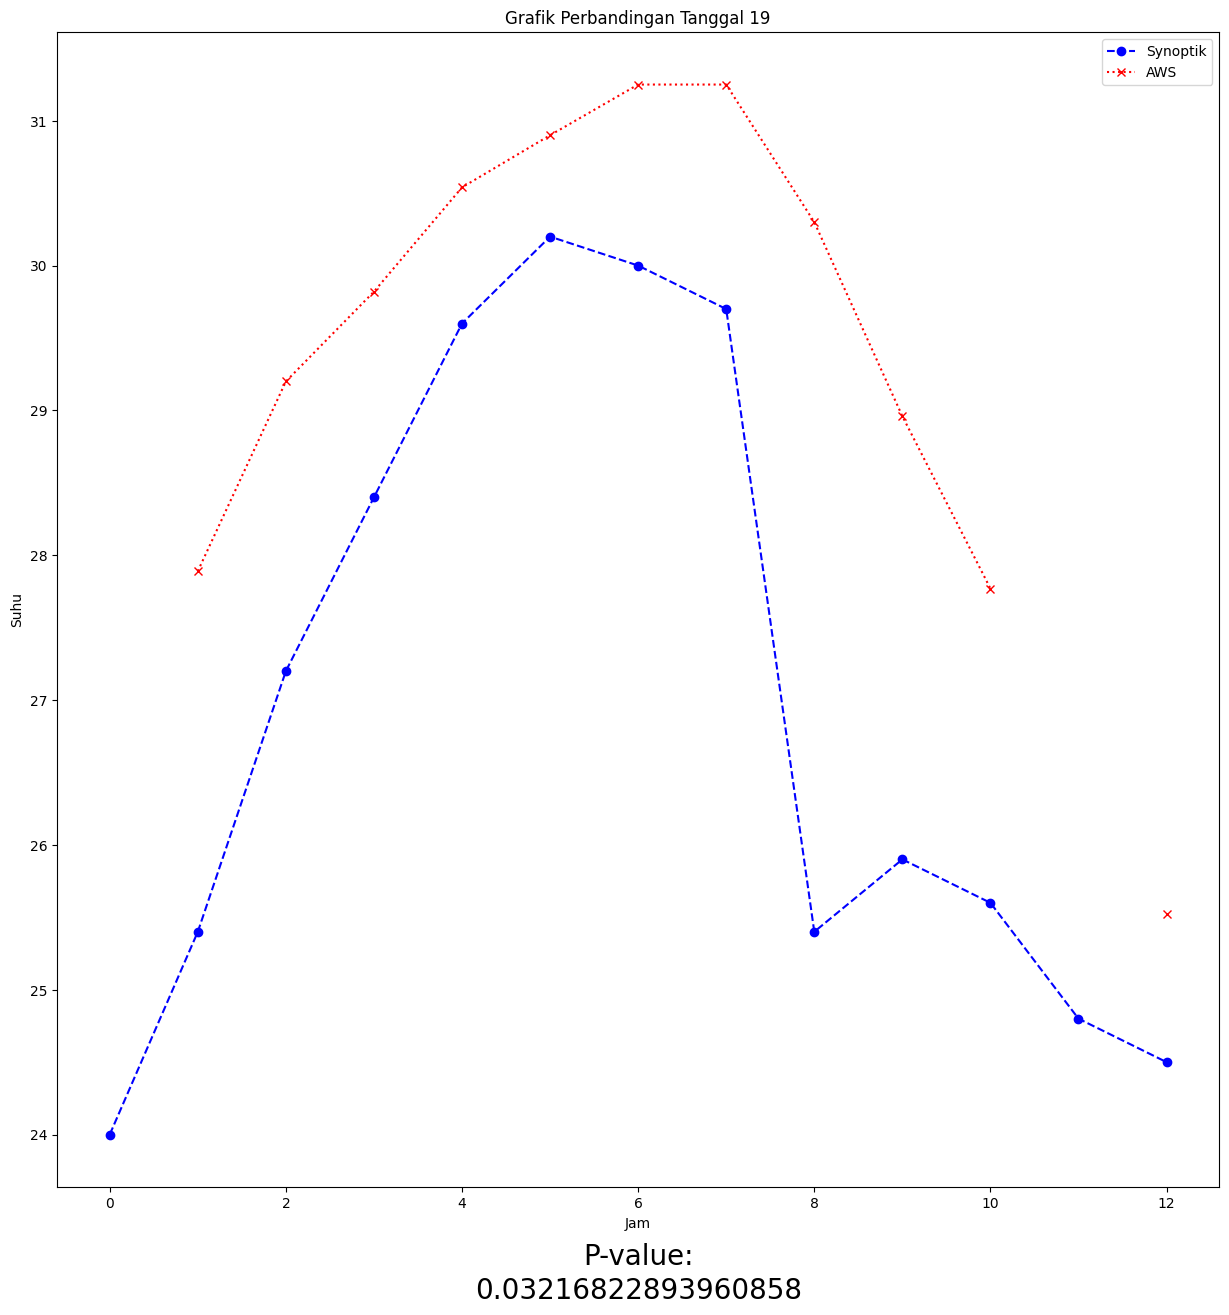

In [24]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[18])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['19']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='19', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['19'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('19')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['19']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='19', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['19'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('19')
    else:
      print("Dilakukan Uji T")
      ujiT('19')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('19')
    else:
      print("Dilakukan Uji T")
      ujiT('19')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 19')
plt.plot(df2_4['Jam'], df2_4['19'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 20

Indeks baris yang berisi NaN:
Index([256, 258], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 2.32074502167396
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.030983814466581272
p-value for one tailed: 0.015491907233290636
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


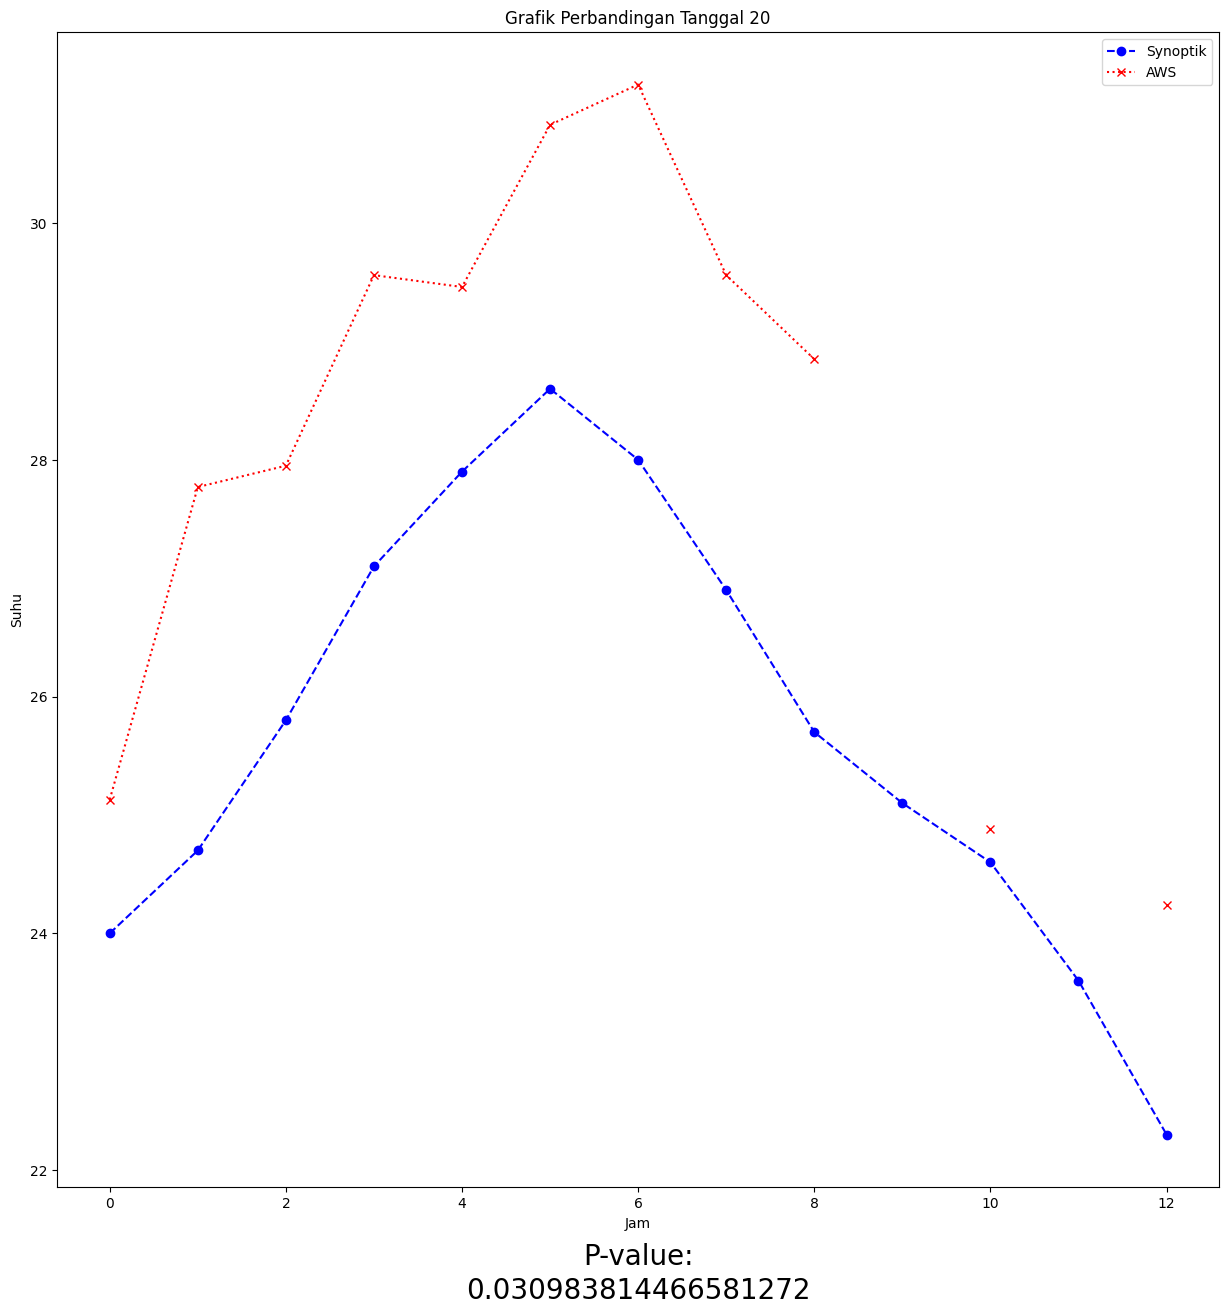

In [25]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[19])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['20']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='20', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['20'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('20')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['20']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='20', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['20'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('20')
    else:
      print("Dilakukan Uji T")
      ujiT('20')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('20')
    else:
      print("Dilakukan Uji T")
      ujiT('20')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 20')
plt.plot(df2_4['Jam'], df2_4['20'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 21

Indeks baris yang berisi NaN:
Index([261, 270, 271], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.0150261485307857
Critical value for t two tailed: 2.10092204024096
Critical value for t one tailed: 1.7340636066175354
p-value for two tailed: 0.3235436689164852
p-value for one tailed: 0.1617718344582426
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


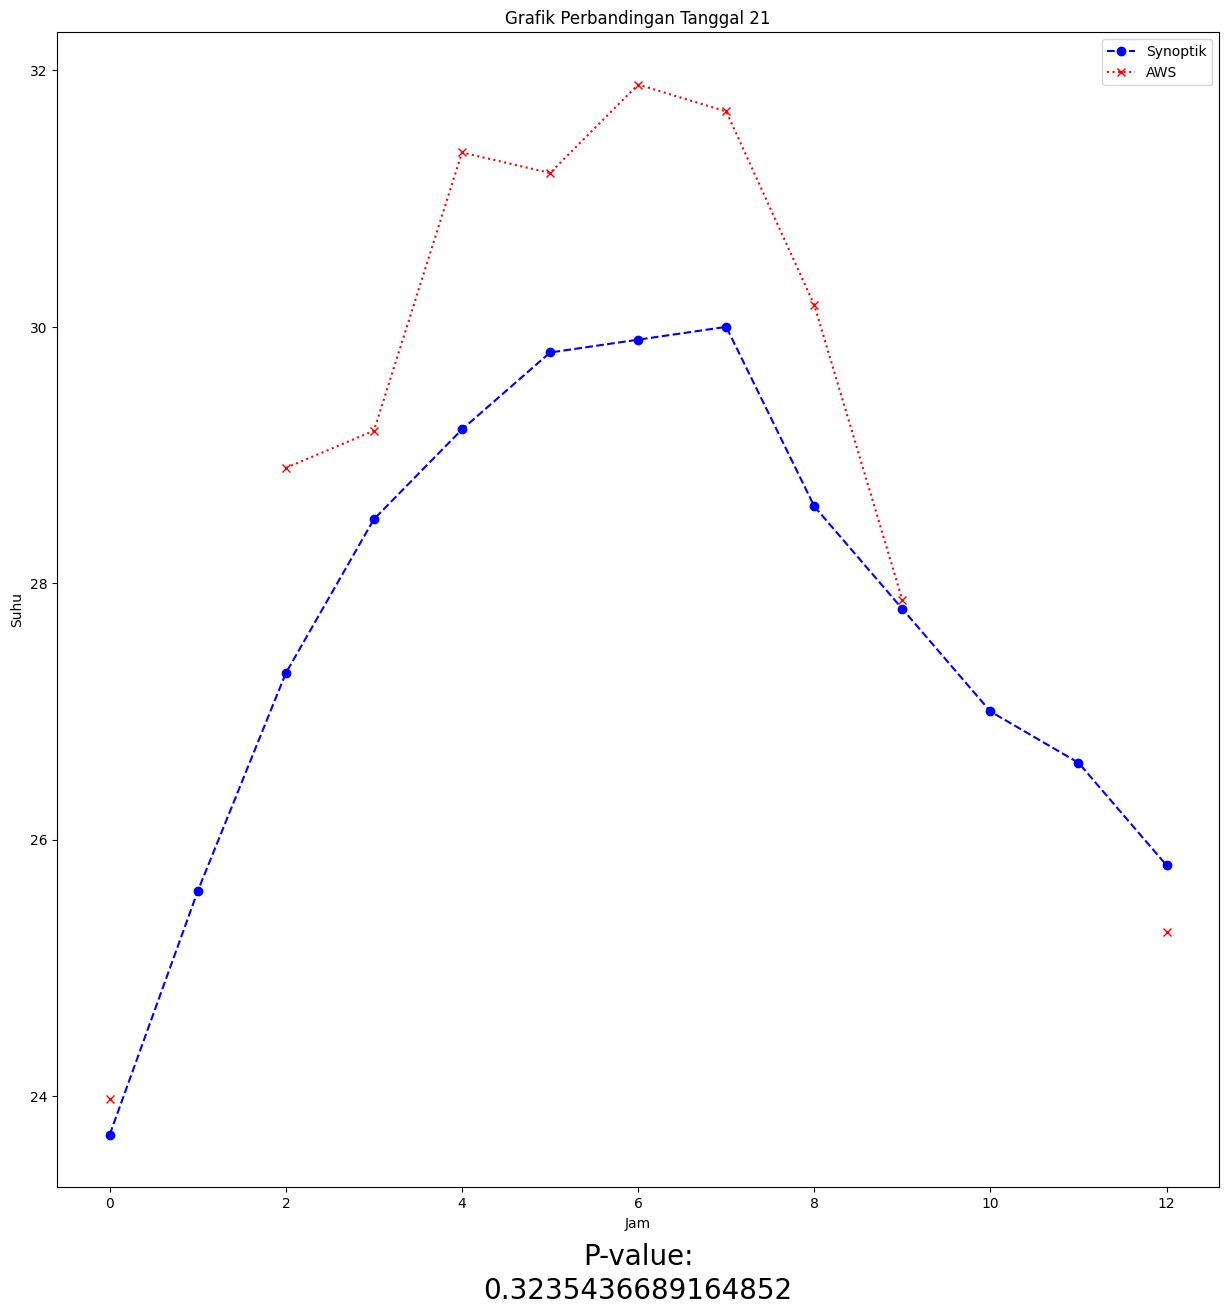

In [26]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[20])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['21']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='21', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['21'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('21')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['21']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='21', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['21'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('21')
    else:
      print("Dilakukan Uji T")
      ujiT('21')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('21')
    else:
      print("Dilakukan Uji T")
      ujiT('21')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 21')
plt.plot(df2_4['Jam'], df2_4['21'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 22

Indeks baris yang berisi NaN:
Index([273], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.8137449321920763
Critical value for t two tailed: 2.0738730679040147
Critical value for t one tailed: 1.717144374380242
p-value for two tailed: 0.42451143034860683
p-value for one tailed: 0.21225571517430342
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


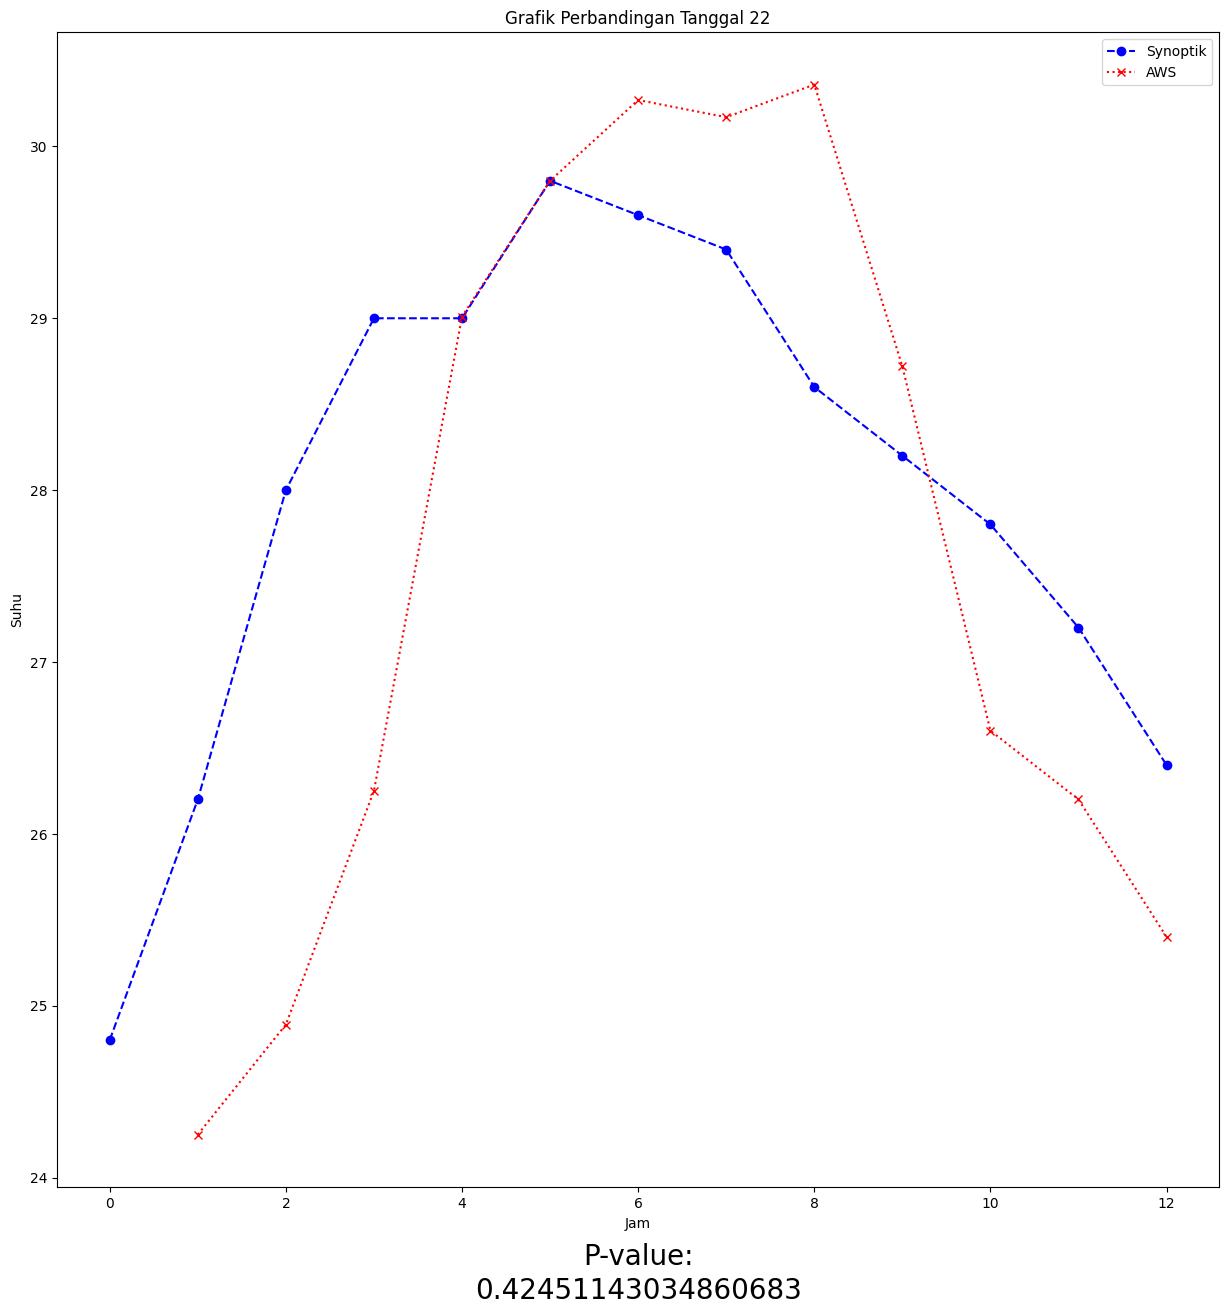

In [27]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[21])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['22']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='22', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['22'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('22')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['22']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='22', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['22'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('22')
    else:
      print("Dilakukan Uji T")
      ujiT('22')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('22')
    else:
      print("Dilakukan Uji T")
      ujiT('22')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 22')
plt.plot(df2_4['Jam'], df2_4['22'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 23

Indeks baris yang berisi NaN:
Index([286, 297], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 3.1345130898889733
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.005219459416087924
p-value for one tailed: 0.002609729708043962
Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).
Grafik Perbandingannya:


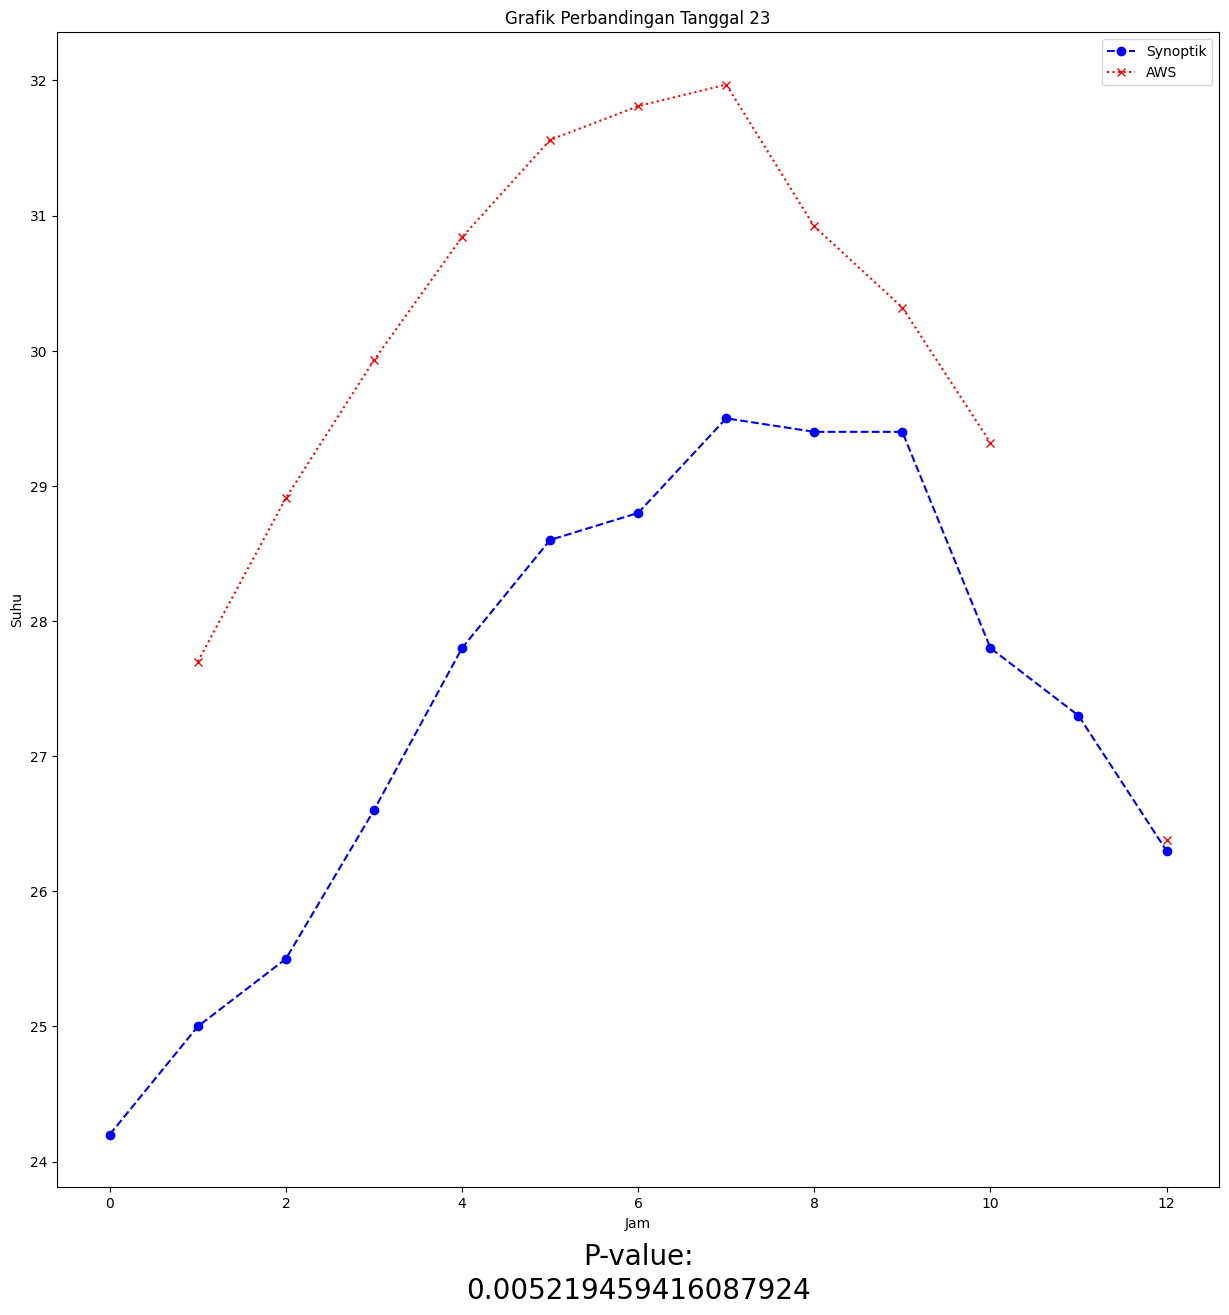

In [28]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[22])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['23']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='23', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['23'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('23')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['23']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='23', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['23'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('23')
    else:
      print("Dilakukan Uji T")
      ujiT('23')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('23')
    else:
      print("Dilakukan Uji T")
      ujiT('23')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 23')
plt.plot(df2_4['Jam'], df2_4['23'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 24

Indeks baris yang berisi NaN:
Index([300, 310, 311], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.7546132311887508
Critical value for t two tailed: 2.10092204024096
Critical value for t one tailed: 1.7340636066175354
p-value for two tailed: 0.46024077505308725
p-value for one tailed: 0.23012038752654362
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


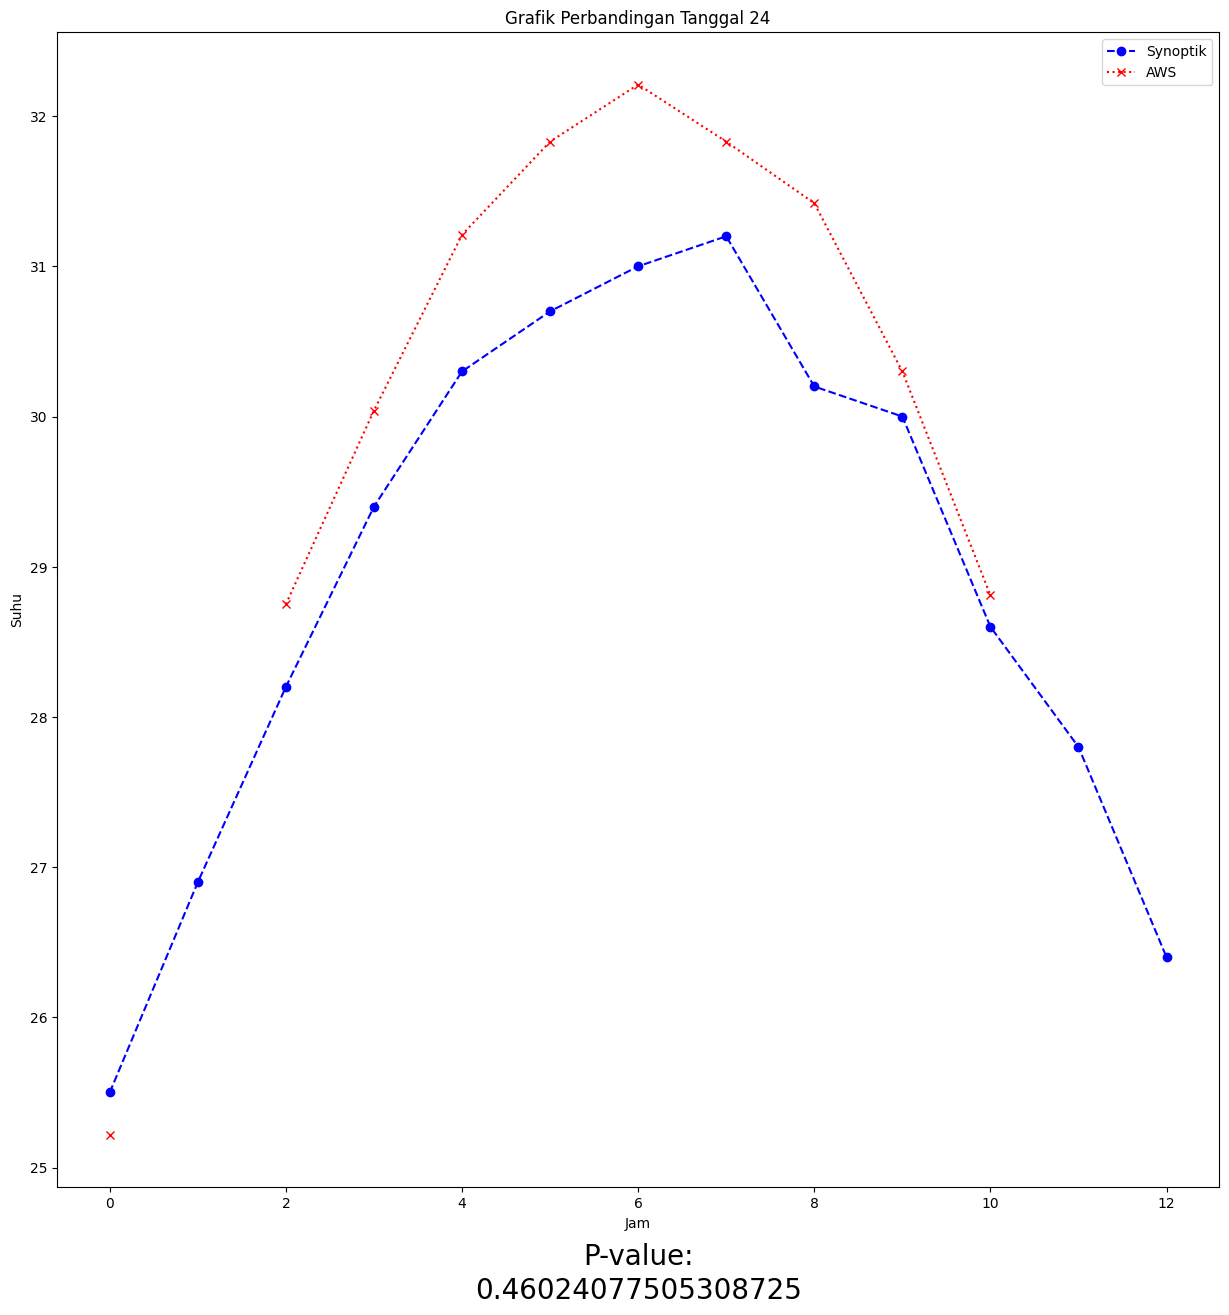

In [29]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[23])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['24']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='24', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['24'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('24')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['24']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='24', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['24'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('24')
    else:
      print("Dilakukan Uji T")
      ujiT('24')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('24')
    else:
      print("Dilakukan Uji T")
      ujiT('24')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 24')
plt.plot(df2_4['Jam'], df2_4['24'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 25

Indeks baris yang berisi NaN:
Index([312, 321], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.9151594668896808
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.0698833153618561
p-value for one tailed: 0.03494165768092805
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


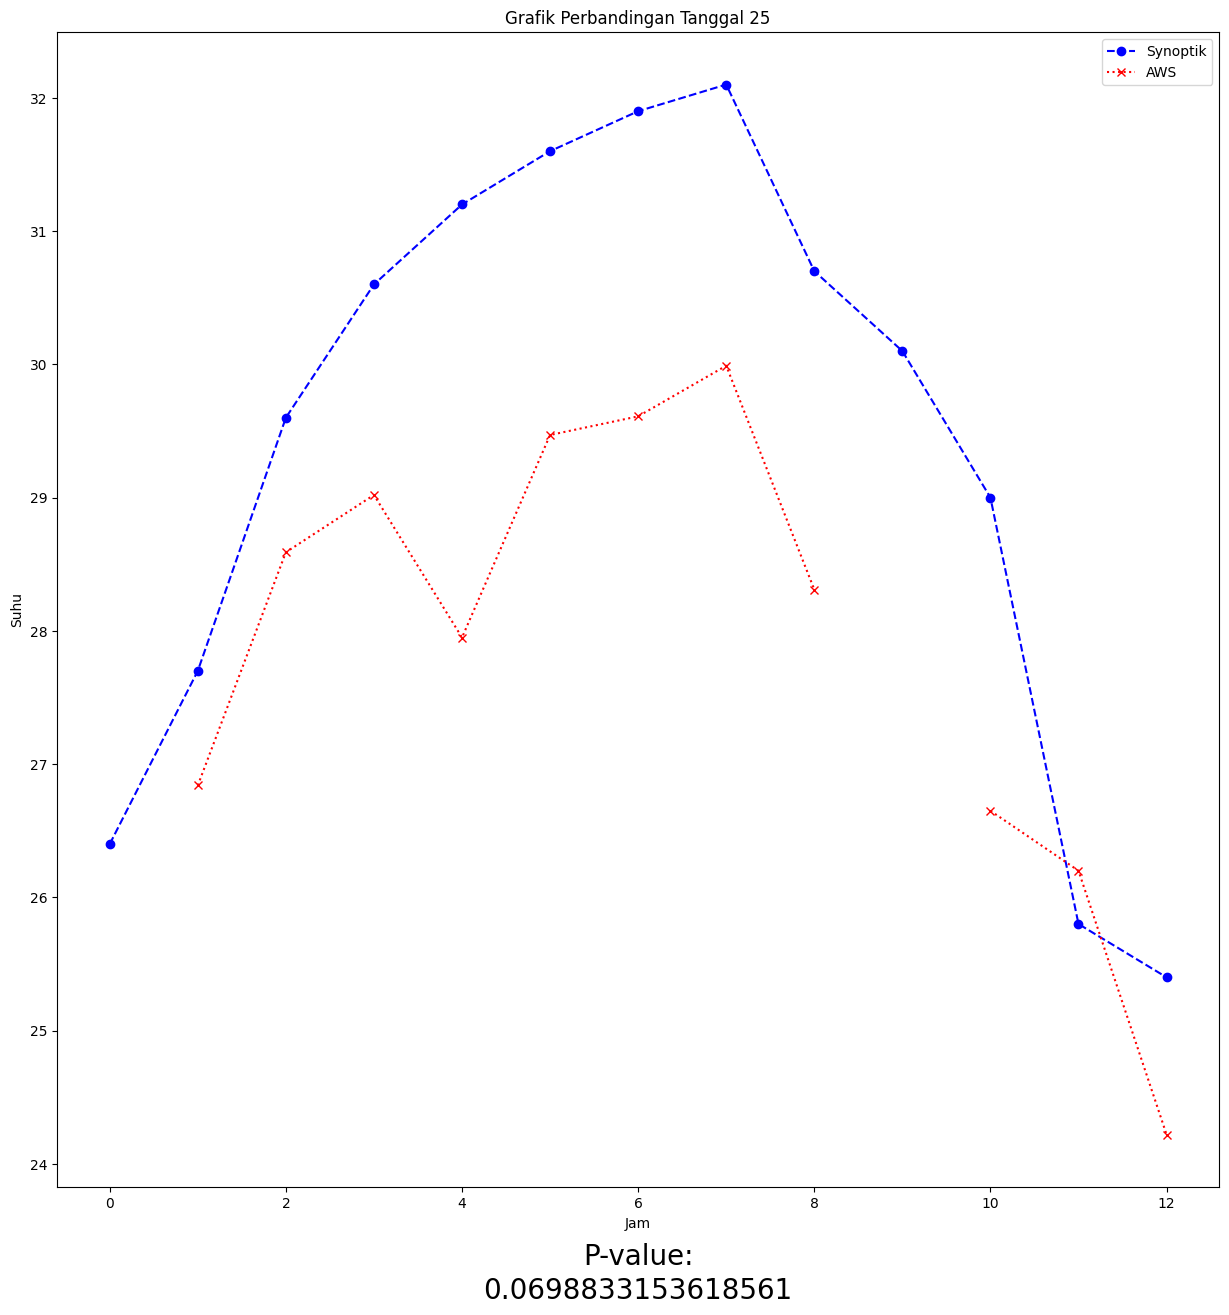

In [30]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[24])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['25']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='25', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['25'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('25')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['25']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='25', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['25'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('25')
    else:
      print("Dilakukan Uji T")
      ujiT('25')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('25')
    else:
      print("Dilakukan Uji T")
      ujiT('25')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 25')
plt.plot(df2_4['Jam'], df2_4['25'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 26

Indeks baris yang berisi NaN:
Index([327, 335], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.43393245640975947
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.6689824163748177
p-value for one tailed: 0.33449120818740885
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


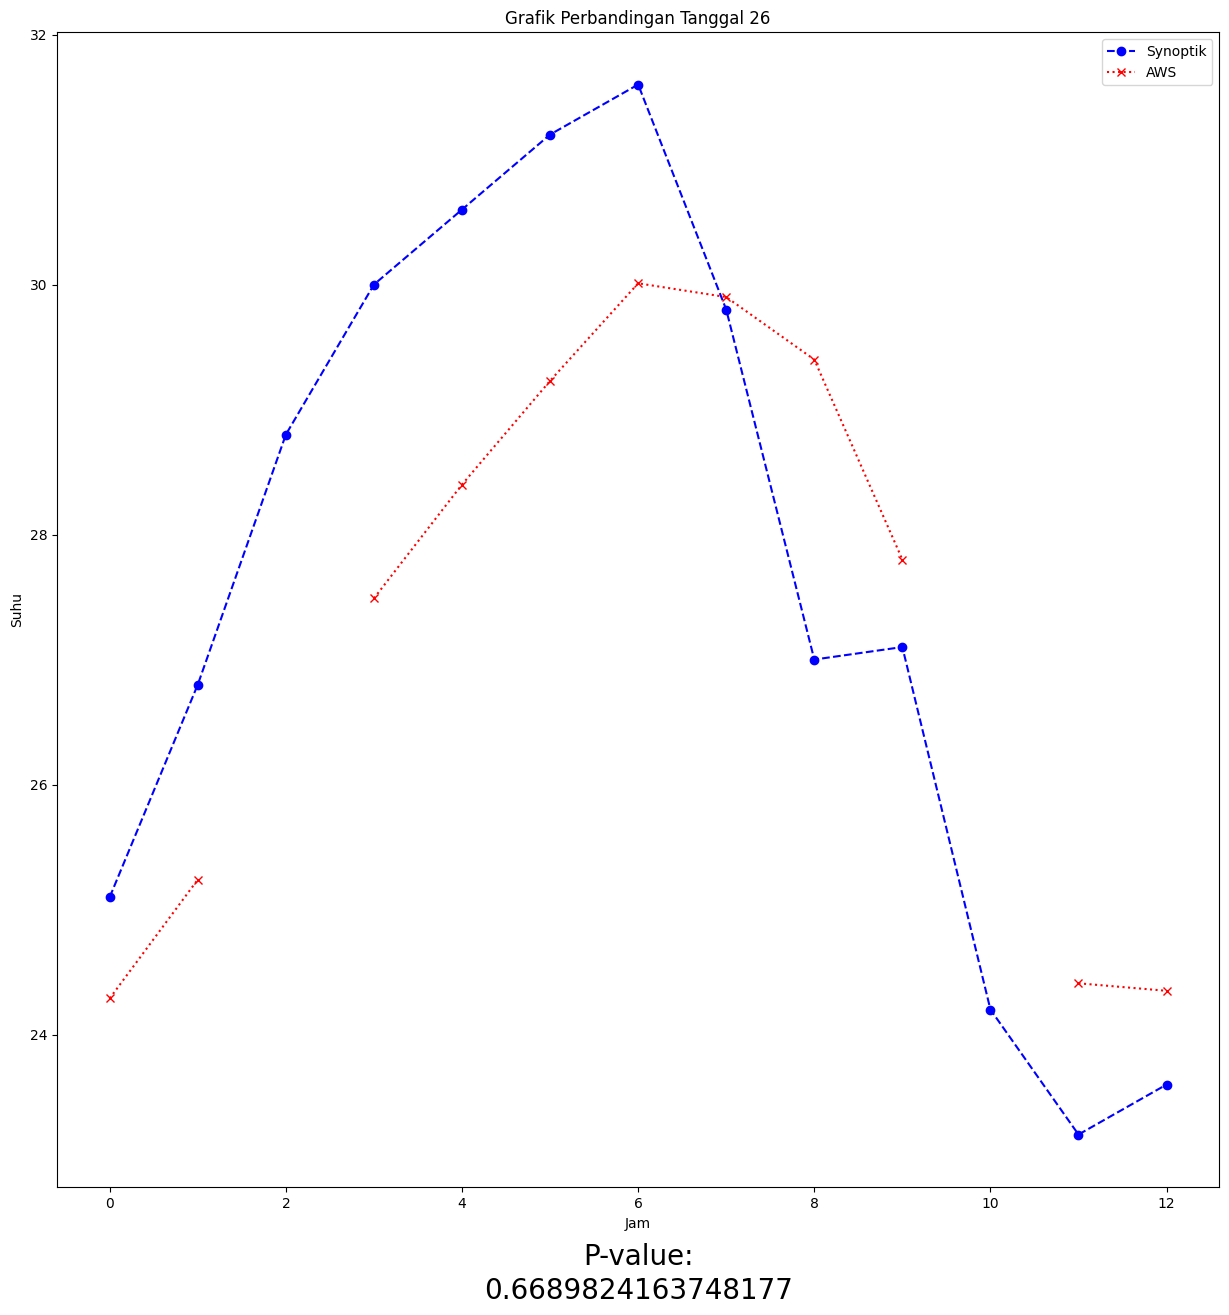

In [31]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[25])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['26']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='26', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['26'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('26')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['26']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='26', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['26'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('26')
    else:
      print("Dilakukan Uji T")
      ujiT('26')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('26')
    else:
      print("Dilakukan Uji T")
      ujiT('26')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 26')
plt.plot(df2_4['Jam'], df2_4['26'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 27

Indeks baris yang berisi NaN:
Index([338, 339, 347, 348, 350], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.3717438822816395
Critical value for t two tailed: 2.1447866879169273
Critical value for t one tailed: 1.7613101357748562
p-value for two tailed: 0.1917270885368203
p-value for one tailed: 0.09586354426841015
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


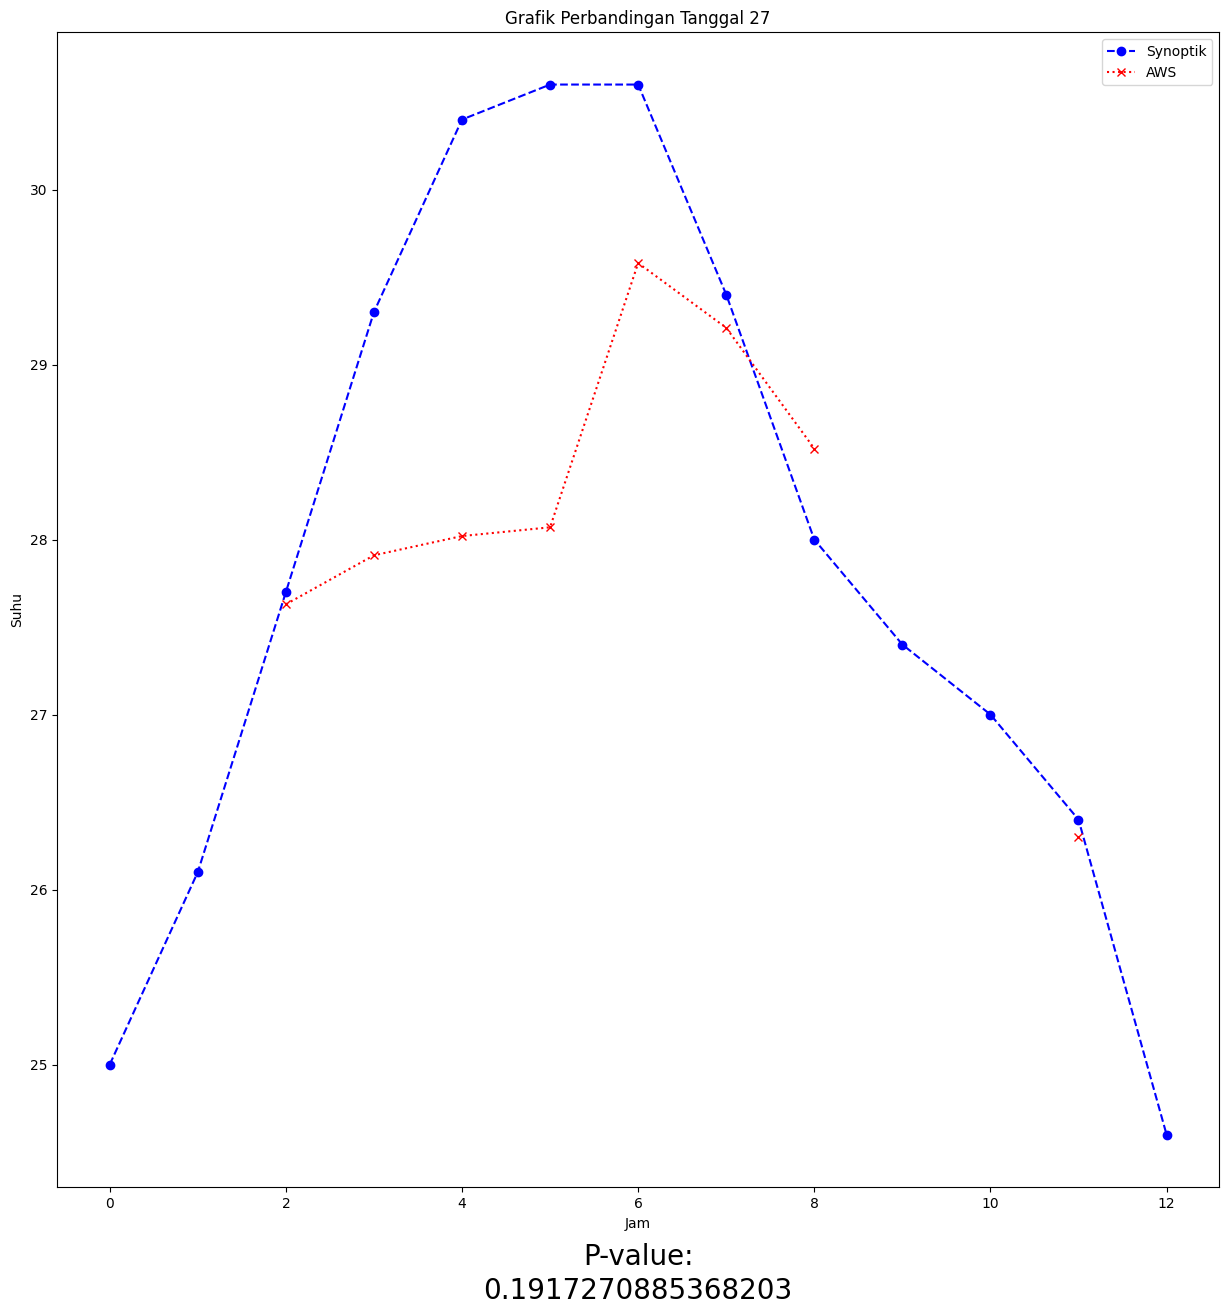

In [32]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[26])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['27']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='27', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['27'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('27')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['27']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='27', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['27'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('27')
    else:
      print("Dilakukan Uji T")
      ujiT('27')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('27')
    else:
      print("Dilakukan Uji T")
      ujiT('27')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 27')
plt.plot(df2_4['Jam'], df2_4['27'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 28

Indeks baris yang berisi NaN:
Index([351, 352, 353, 360], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=29.00, p=0.33
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_980\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


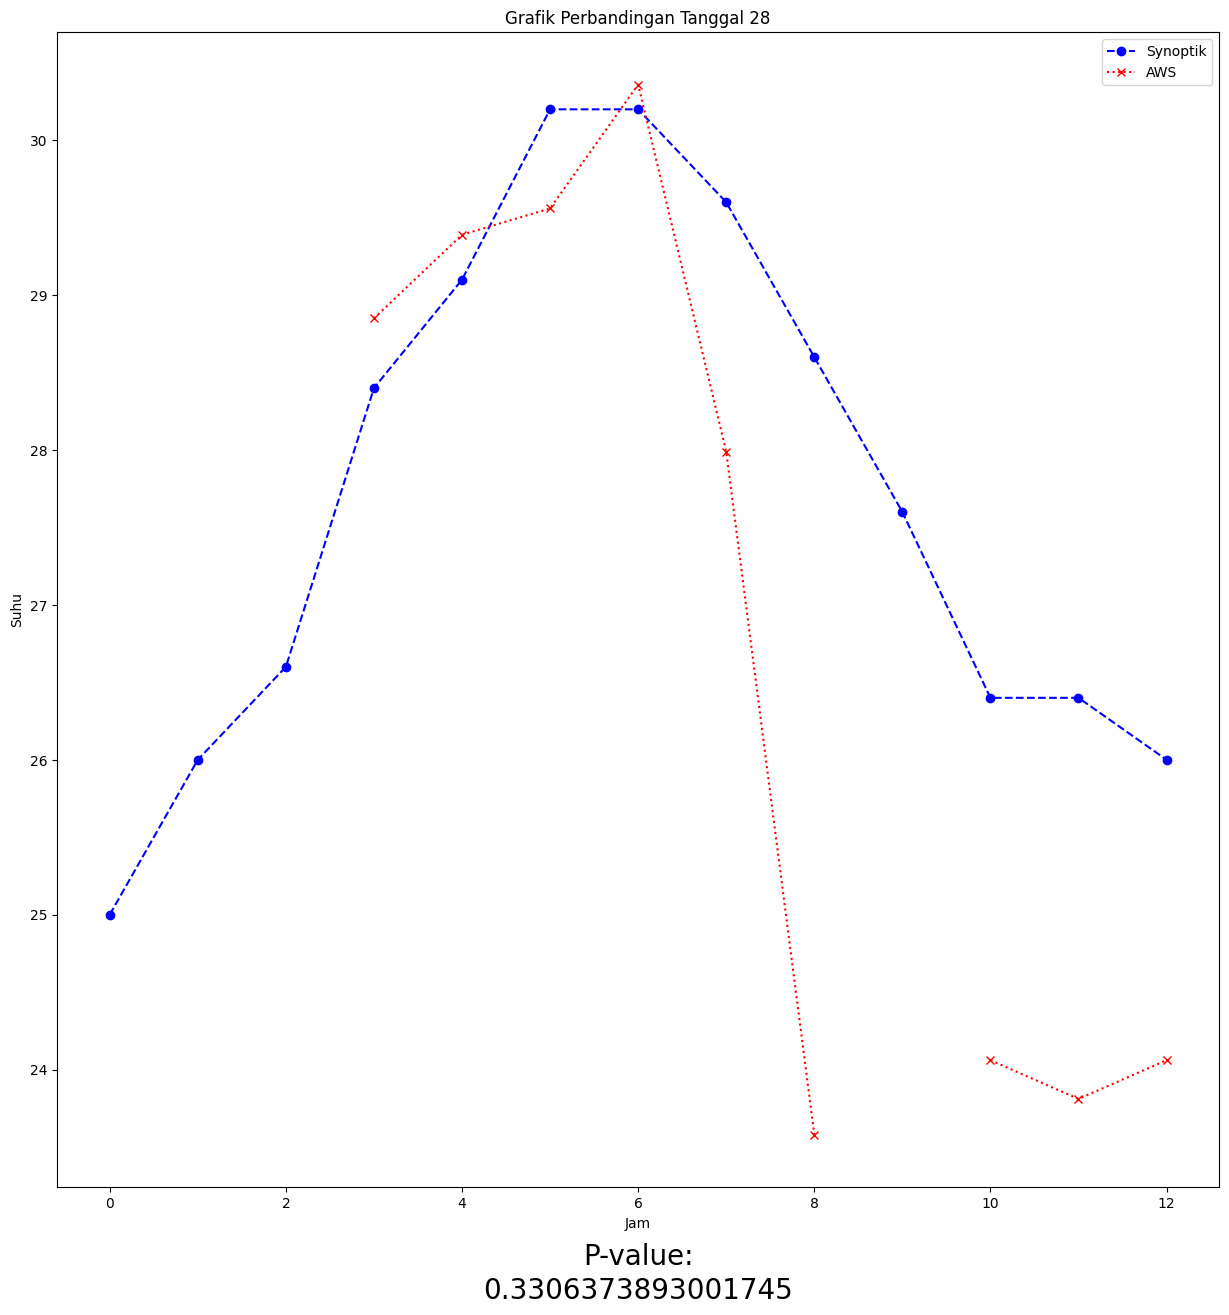

In [33]:
#Filter data AWS di tanggal 1
df['Tanggal'] = dp.to_datetime(df['Tanggal'])
Jam=[]
for i in range(13):
  Jam.append(i)
aws=dp.DataFrame(list_of_dfs[27])
aws['Jam']=Jam
d1=aws['tt_air_avg']
df1 = dp.DataFrame(d1)
df1['Jam']=Jam

#Cek NaN
rows_with_nan4 = df1.isna().any(axis=1)
indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = aws['Jam'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1.dropna()

#Filter Data Synoptik di tanggal yang dibutuhkan
d2_4=a['28']
df2_4 = dp.DataFrame(d2_4)
df2_4['Jam']=Jam

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='28', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['28'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('28')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['28']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned14['Jam']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='28', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['28'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('28')
    else:
      print("Dilakukan Uji T")
      ujiT('28')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=dp.DataFrame(df_max_scaled)
    df_max_scaled['Jam']=df_cleaned_4['Jam']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('28')
    else:
      print("Dilakukan Uji T")
      ujiT('28')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Jam']=df2_4['Jam'].astype(int)
df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Tanggal 28')
plt.plot(df2_4['Jam'], df2_4['28'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Jam')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Tanggal 29

Indeks baris yang berisi NaN:
Index([364, 376], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.4766548232241983
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.1553413544349953
p-value for one tailed: 0.07767067721749765
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


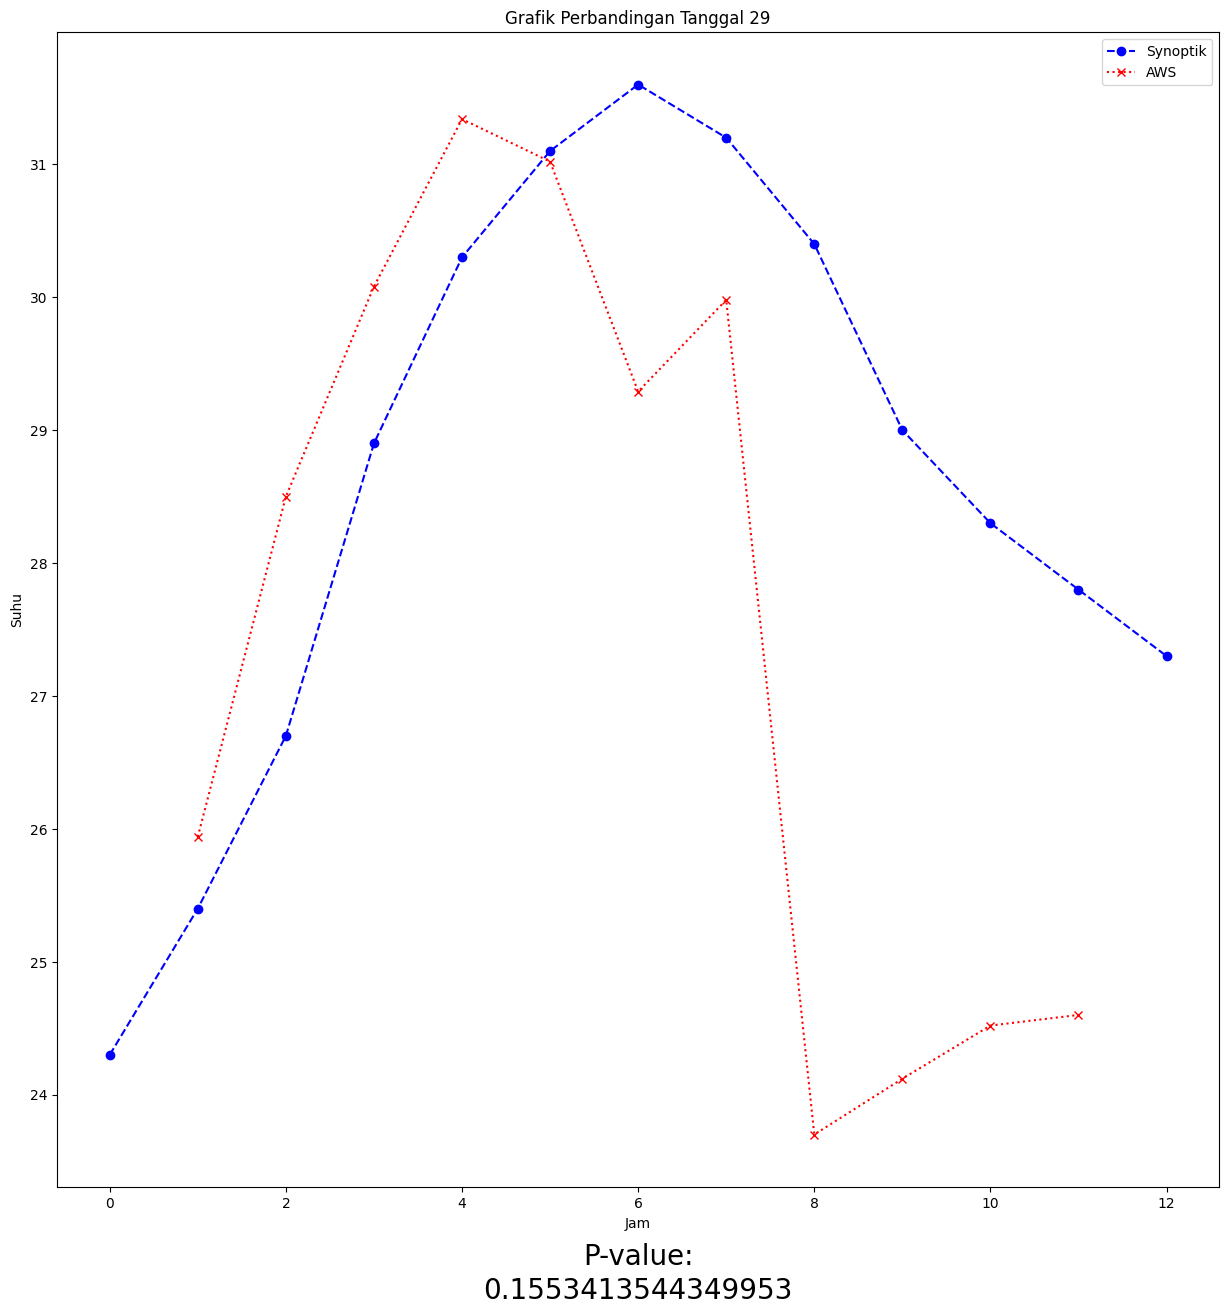

In [34]:
if len(list_of_dfs)==28:
  print(" ")
else:
  #Filter data AWS di tanggal 1
  df['Tanggal'] = dp.to_datetime(df['Tanggal'])
  Jam=[]
  for i in range(13):
    Jam.append(i)
  aws=dp.DataFrame(list_of_dfs[28])
  aws['Jam']=Jam
  d1=aws['tt_air_avg']
  df1 = dp.DataFrame(d1)
  df1['Jam']=Jam

  #Cek NaN
  rows_with_nan4 = df1.isna().any(axis=1)
  indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
  r4=indeks_baris_dengan_nan4.values.tolist()
  nilai_baris14 = aws['Jam'].loc[r4]
  c4=nilai_baris14.values.tolist()
  print("Indeks baris yang berisi NaN:")
  print(indeks_baris_dengan_nan4)

  #Hapus NaN
  df_cleaned_4 = df1.dropna()

  #Filter Data Synoptik di tanggal yang dibutuhkan
  d2_4=a['29']
  df2_4 = dp.DataFrame(d2_4)
  df2_4['Jam']=Jam

  #Hapus tanggal synoptik yang di AWS adalah NaN
  df2_4=df2_4.dropna(axis=1)
  filter_hapus4 = df2_4.isin(c4).any(axis=1)
  df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

  #Mengurutkan Data
  df_sorted_4 = df_cleaned14.sort_values(by='29', ascending=True)
  df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

  #Uji distribusi Normal
  #Synoptik
  statistic4, p_value4 = stats.shapiro(df_sorted_4['29'])
  #AWS
  df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
  statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
  if p_value4>=0.05 and p_value14 >= 0.05:
    print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
    ujiT('29')
  else:
    print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
    if p_value4<0.05:
      print("Data synoptik tidak berdistribusi Normal")

      #Normalisasi
      df_max_scaled = df_cleaned14['29']
      for col in df_max_scaled:
          df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Jam']=df_cleaned14['Jam']
      #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='29', ascending=True)

      #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['29'])
      if p_value4<0.05:
        print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
        mwu('29')
      else:
        print("Dilakukan Uji T")
        ujiT('29')
    else:
      print("Data AWS tidak berdistribusi Normal")
      #Normalisasi
      df_max_scaled = df_cleaned_4['tt_air_avg']
      for col in df_max_scaled:
          df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Jam']=df_cleaned_4['Jam']

      #Mengurutkan data
      df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

      #Uji Distribusi Normal AWS
      df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
      if p_value14<0.05:
        print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
        mwu('29')
      else:
        print("Dilakukan Uji T")
        ujiT('29')

  #Grafik
  print("Grafik Perbandingannya:")
  df2_4['Jam']=df2_4['Jam'].astype(int)
  df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
  plt.figure(figsize=(15,15))
  plt.title('Grafik Perbandingan Tanggal 29')
  plt.plot(df2_4['Jam'], df2_4['29'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
  plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
  plt.legend(loc='upper right')
  plt.xlabel('Jam')
  plt.ylabel('Suhu')
  plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  if p_value4>=0.05 and p_value14 >= 0.05:
    plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  else:
    plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  plt.show()

Tanggal 30

Indeks baris yang berisi NaN:
Index([378, 388, 389], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=17.00, p=0.01
Terdapat perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_980\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


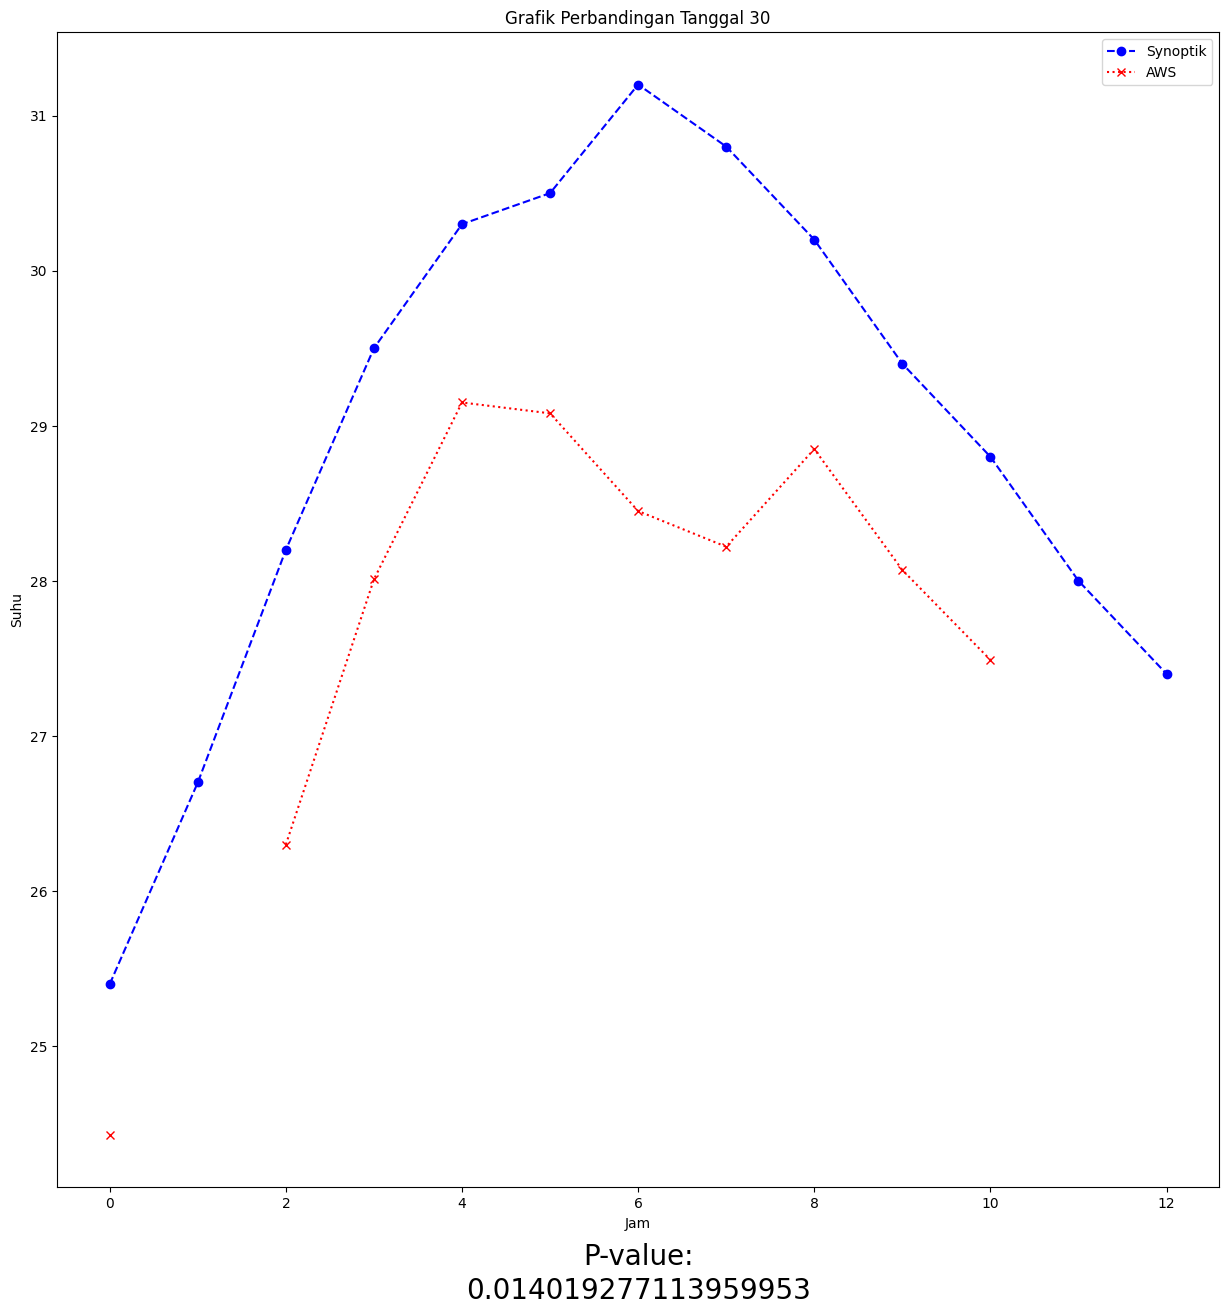

In [35]:
if len(list_of_dfs)==29:
  print(" ")
else:
  #Filter data AWS di tanggal 1
  df['Tanggal'] = dp.to_datetime(df['Tanggal'])
  Jam=[]
  for i in range(13):
    Jam.append(i)
  aws=dp.DataFrame(list_of_dfs[29])
  aws['Jam']=Jam
  d1=aws['tt_air_avg']
  df1 = dp.DataFrame(d1)
  df1['Jam']=Jam

  #Cek NaN
  rows_with_nan4 = df1.isna().any(axis=1)
  indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
  r4=indeks_baris_dengan_nan4.values.tolist()
  nilai_baris14 = aws['Jam'].loc[r4]
  c4=nilai_baris14.values.tolist()
  print("Indeks baris yang berisi NaN:")
  print(indeks_baris_dengan_nan4)

  #Hapus NaN
  df_cleaned_4 = df1.dropna()

  #Filter Data Synoptik di tanggal yang dibutuhkan
  d2_4=a['30']
  df2_4 = dp.DataFrame(d2_4)
  df2_4['Jam']=Jam

  #Hapus tanggal synoptik yang di AWS adalah NaN
  df2_4=df2_4.dropna(axis=1)
  filter_hapus4 = df2_4.isin(c4).any(axis=1)
  df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

  #Mengurutkan Data
  df_sorted_4 = df_cleaned14.sort_values(by='30', ascending=True)
  df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

  #Uji distribusi Normal
  #Synoptik
  statistic4, p_value4 = stats.shapiro(df_sorted_4['30'])
  #AWS
  df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
  statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
  if p_value4>=0.05 and p_value14 >= 0.05:
    print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
    ujiT('30')
  else:
    print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
    if p_value4<0.05:
      print("Data synoptik tidak berdistribusi Normal")

      #Normalisasi
      df_max_scaled = df_cleaned14['30']
      for col in df_max_scaled:
          df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Jam']=df_cleaned14['Jam']
      #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='30', ascending=True)

      #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['30'])
      if p_value4<0.05:
        print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
        mwu('30')
      else:
        print("Dilakukan Uji T")
        ujiT('30')
    else:
      print("Data AWS tidak berdistribusi Normal")
      #Normalisasi
      df_max_scaled = df_cleaned_4['tt_air_avg']
      for col in df_max_scaled:
          df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Jam']=df_cleaned_4['Jam']

      #Mengurutkan data
      df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

      #Uji Distribusi Normal AWS
      df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
      if p_value14<0.05:
        print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
        mwu('30')
      else:
        print("Dilakukan Uji T")
        ujiT('30')

  #Grafik
  print("Grafik Perbandingannya:")
  df2_4['Jam']=df2_4['Jam'].astype(int)
  df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
  plt.figure(figsize=(15,15))
  plt.title('Grafik Perbandingan Tanggal 30')
  plt.plot(df2_4['Jam'], df2_4['30'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
  plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
  plt.legend(loc='upper right')
  plt.xlabel('Jam')
  plt.ylabel('Suhu')
  plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  if p_value4>=0.05 and p_value14 >= 0.05:
    plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  else:
    plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  plt.show()

Tanggal 31

Indeks baris yang berisi NaN:
Index([398, 402], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.3843607307849448
Critical value for t two tailed: 2.0859634472658364
Critical value for t one tailed: 1.7247182429207857
p-value for two tailed: 0.1815010787464717
p-value for one tailed: 0.09075053937323585
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


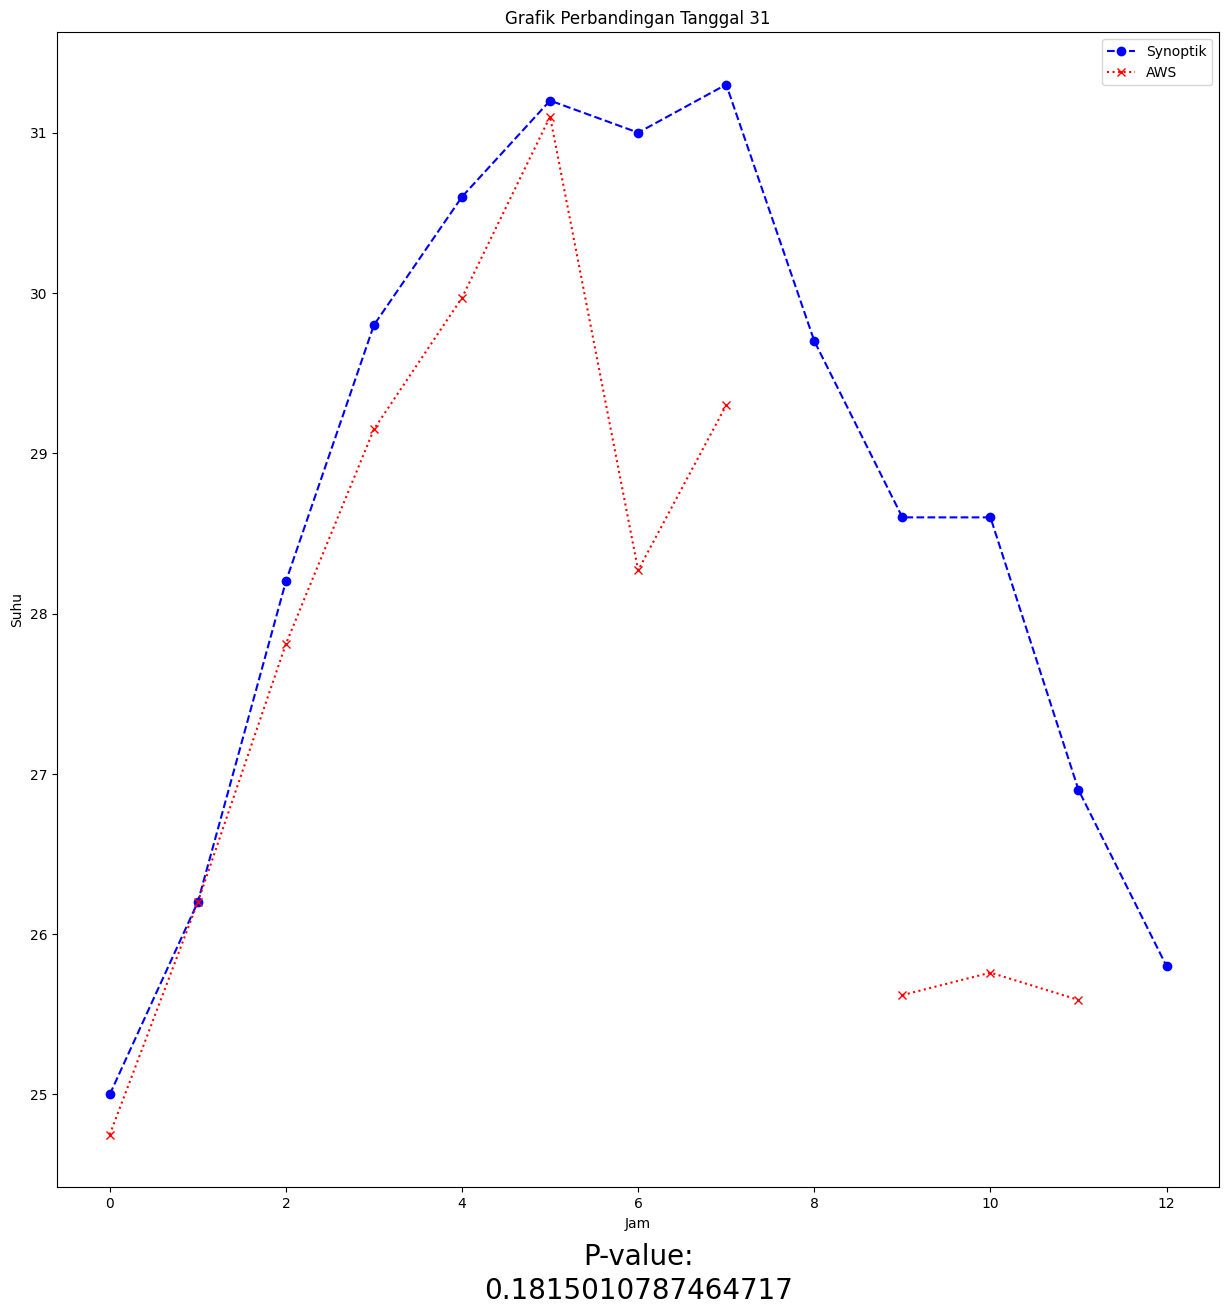

In [36]:
if len(list_of_dfs)==30:
  print(" ")
else:
  #Filter data AWS di tanggal 1
  df['Tanggal'] = dp.to_datetime(df['Tanggal'])
  Jam=[]
  for i in range(13):
    Jam.append(i)
  aws=dp.DataFrame(list_of_dfs[30])
  aws['Jam']=Jam
  d1=aws['tt_air_avg']
  df1 = dp.DataFrame(d1)
  df1['Jam']=Jam

  #Cek NaN
  rows_with_nan4 = df1.isna().any(axis=1)
  indeks_baris_dengan_nan4= df1.index[rows_with_nan4]
  r4=indeks_baris_dengan_nan4.values.tolist()
  nilai_baris14 = aws['Jam'].loc[r4]
  c4=nilai_baris14.values.tolist()
  print("Indeks baris yang berisi NaN:")
  print(indeks_baris_dengan_nan4)

  #Hapus NaN
  df_cleaned_4 = df1.dropna()

  #Filter Data Synoptik di tanggal yang dibutuhkan
  d2_4=a['31']
  df2_4 = dp.DataFrame(d2_4)
  df2_4['Jam']=Jam

  #Hapus tanggal synoptik yang di AWS adalah NaN
  df2_4=df2_4.dropna(axis=1)
  filter_hapus4 = df2_4.isin(c4).any(axis=1)
  df_cleaned14 = df2_4.drop(a[filter_hapus4].index)

  #Mengurutkan Data
  df_sorted_4 = df_cleaned14.sort_values(by='31', ascending=True)
  df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

  #Uji distribusi Normal
  #Synoptik
  statistic4, p_value4 = stats.shapiro(df_sorted_4['31'])
  #AWS
  df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
  statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
  if p_value4>=0.05 and p_value14 >= 0.05:
    print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
    ujiT('31')
  else:
    print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
    if p_value4<0.05:
      print("Data synoptik tidak berdistribusi Normal")

      #Normalisasi
      df_max_scaled = df_cleaned14['31']
      for col in df_max_scaled:
          df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Jam']=df_cleaned14['Jam']
      #Mengurutkan data
      df_sorted_4 = df_max_scaled.sort_values(by='31', ascending=True)

      #Uji Distribusi Normal Synoptik
      statistic4, p_value4 = stats.shapiro(df_sorted_4['31'])
      if p_value4<0.05:
        print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
        mwu('31')
      else:
        print("Dilakukan Uji T")
        ujiT('31')
    else:
      print("Data AWS tidak berdistribusi Normal")
      #Normalisasi
      df_max_scaled = df_cleaned_4['tt_air_avg']
      for col in df_max_scaled:
          df_max_scaled= absolute_maximum_scale(df_max_scaled)
      df_max_scaled=dp.DataFrame(df_max_scaled)
      df_max_scaled['Jam']=df_cleaned_4['Jam']

      #Mengurutkan data
      df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

      #Uji Distribusi Normal AWS
      df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
      statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
      if p_value14<0.05:
        print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
        mwu('31')
      else:
        print("Dilakukan Uji T")
        ujiT('31')

  #Grafik
  print("Grafik Perbandingannya:")
  df2_4['Jam']=df2_4['Jam'].astype(int)
  df1['tt_air_avg']=df1['tt_air_avg'].astype(float)
  plt.figure(figsize=(15,15))
  plt.title('Grafik Perbandingan Tanggal 31')
  plt.plot(df2_4['Jam'], df2_4['31'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
  plt.plot(df1['Jam'], df1['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
  plt.legend(loc='upper right')
  plt.xlabel('Jam')
  plt.ylabel('Suhu')
  plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  if p_value4>=0.05 and p_value14 >= 0.05:
    plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  else:
    plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
  plt.show()